In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
def transform_gvhd_proph(data_df, mapping_df):
    # Merge the datasets on gvhd_proph and column_name
    transformed_df = data_df.merge(mapping_df, left_on='gvhd_proph', right_on='column_name', how='left')

    # Drop the redundant column_name column
    transformed_df.drop(columns=['column_name', 'gvhd_proph'], inplace=True)

    return transformed_df

In [ ]:
# Load the mapping file
mapping_file = "gvhd_proph_rename.csv"
gvhd_mappings = pd.read_csv(mapping_file).fillna(0)
print(gvhd_mappings)

                        column_name   FK  CSA  MMF  MTX  PTCy  TCD  CD34  \
0                           FKalone  1.0  0.0  0.0  0.0   0.0  0.0   0.0   
1                         CSA alone  0.0  1.0  0.0  0.0   0.0  0.0   0.0   
2                 FK+ MMF +- others  1.0  0.0  1.0  0.0   0.0  0.0   0.0   
3       CSA + MMF +- others(not FK)  0.0  1.0  1.0  0.0   0.0  0.0   0.0   
4   CSA + MTX +- others(not MMF,FK)  0.0  1.0  0.0  1.0   0.0  0.0   0.0   
5        FK+ MTX +- others(not MMF)  1.0  0.0  0.0  1.0   0.0  0.0   0.0   
6          FK+- others(not MMF,MTX)  1.0  0.0  0.0  0.0   0.0  0.0   0.0   
7     CSA +- others(not FK,MMF,MTX)  0.0  1.0  0.0  0.0   0.0  0.0   0.0   
8            Cyclophosphamide alone  0.0  0.0  0.0  0.0   1.0  0.0   0.0   
9        Cyclophosphamide +- others  0.0  0.0  0.0  0.0   1.0  0.0   0.0   
10                 TDEPLETION alone  0.0  0.0  0.0  0.0   0.0  1.0   0.0   
11              TDEPLETION +- other  0.0  0.0  0.0  0.0   0.0  1.0   0.0   
12          

In [ ]:
def create_all_group_mappings(df):
    """
    Creates a dictionary of dictionaries mapping old values to new values for each column.

    :param df: The DataFrame containing the mapping.
    :return: A dictionary where keys are column names and values are dictionaries mapping Old_group to New_group.
    """
    mappings = {}
    for column_name in df['Column'].unique():
        filtered_df = df[df['Column'] == column_name]
        mappings[column_name] = dict(zip(filtered_df['Old_group'], filtered_df['New_group']))
    return mappings

In [ ]:
# Example usage (assuming you have read the PDF into a DataFrame named df):
df = pd.read_csv("column_rename.csv")  # Convert the PDF table to a CSV or read it directly into a DataFrame
group_mappings = create_all_group_mappings(df)
print(group_mappings)

{'dri_score': {'N/A - non-malignant indication': 'Missing', 'N/A - disease not classifiable': 'Missing', 'N/A - pediatric': 'Missing', 'Missing disease status': 'Missing', nan: 'Missing', 'TBD cytogenetics': 'Missing', 'Intermediate': 'Intermediate', 'Intermediate - TED AML case <missing cytogenetics': 'Intermediate', 'High': 'High', 'High - TED AML case <missing cytogenetics': 'High'}, 'psych_disturb': {nan: 'Missing', 'Not done': 'Missing'}, 'diabetes': {nan: 'Missing', 'Not done': 'Missing'}, 'tbi_status': {'No TBI': 'No', 'TBI +- Other, >cGy': 'Yes', 'TBI + Cy +- Other': 'Yes', 'TBI +- Other, <=cGy': 'Yes', 'TBI +- Other, unknown dose': 'Yes', 'TBI +- Other, -cGy, fractionated': 'Yes', 'TBI +- Other, -cGy, single': 'Yes', 'TBI +- Other, -cGy, unknown dose': 'Yes'}, 'arrhythmia': {nan: 'Missing', 'Not done': 'Missing'}, 'vent_hist': {nan: 'Missing'}, 'renal_issue': {nan: 'Missing', 'Not done': 'Missing'}, 'pulm_severe': {nan: 'Missing', 'Not done': 'Missing'}, 'cmv_status': {nan: 'M

In [ ]:
def apply_mappings(df, mappings):
    """
    Apply mappings to a Pandas DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    mappings (dict): A dictionary where keys are column names and values are dictionaries
                      mapping old values to new values.
                      Example: {'col1': {'old_value1': 'new_value1', 'old_value2': 'new_value2'}}

    Returns:
    pd.DataFrame: The DataFrame with applied mappings.
    """
    df_transformed = df.copy()

    for col, mapping in mappings.items():
        if col in df_transformed.columns:
            df_transformed[col] = df_transformed[col].map(mapping).fillna(df_transformed[col])

    return df_transformed

In [ ]:
def dropping_columns(df, threshold=0.1):
  """
  Drops columns from a DataFrame that have a missing rate higher than the specified threshold.

  Args:
    df: The pandas DataFrame to process.
    threshold: The maximum allowed missing rate (0.0 to 1.0).

  Returns:
    A new DataFrame with columns having a missing rate higher than the threshold dropped.
  """
  #'cyto_score', 'tce_div_match'
  missing_rate = df.isnull().mean()
  columns_to_drop = missing_rate[missing_rate > threshold].index
  df_dropped = df.drop(columns=columns_to_drop)
  df_dropped = df_dropped.drop(columns=['ID', 'prod_type'])
  return df_dropped

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
def cleaning_data(df, mappings1, mappings2):
  cleaned_df = dropping_columns(df)
  cleaned_df = apply_mappings(cleaned_df, mappings1)
  cleaned_df = transform_gvhd_proph(cleaned_df, mappings2)
  # cleaned_df = imputing_missing_values_num_cols(cleaned_df)
  return cleaned_df

In [ ]:
clean_data = cleaning_data(data, group_mappings, gvhd_mappings)

In [ ]:
clean_data.head(5)

,dri_score,psych_disturb,diabetes,tbi_status,arrhythmia,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,...,efs,efs_time,FK,CSA,MMF,MTX,PTCy,TCD,CD34,others
0,Missing,No,No,No,No,Bone marrow,No,No,No,IEA,...,0.0,42.356,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Intermediate,No,No,Yes,No,Peripheral blood,No,No,No,AML,...,1.0,4.672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Missing,No,No,No,No,Bone marrow,No,No,No,HIS,...,0.0,19.793,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,High,No,No,No,No,Bone marrow,No,No,No,ALL,...,0.0,102.349,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,High,No,No,No,No,Peripheral blood,No,No,No,MPN,...,0.0,16.223,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dri_score           28800 non-null  object 
 1   psych_disturb       28800 non-null  object 
 2   diabetes            28800 non-null  object 
 3   tbi_status          28800 non-null  object 
 4   arrhythmia          28800 non-null  object 
 5   graft_type          28800 non-null  object 
 6   vent_hist           28800 non-null  object 
 7   renal_issue         28800 non-null  object 
 8   pulm_severe         28800 non-null  object 
 9   prim_disease_hct    28800 non-null  object 
 10  cmv_status          28800 non-null  object 
 11  hla_match_c_low     26000 non-null  float64
 12  rituximab           28800 non-null  object 
 13  hla_match_drb1_low  26157 non-null  float64
 14  ethnicity           28800 non-null  object 
 15  year_hct            28800 non-null  int64  
 16  obes

In [ ]:
clean_data.to_csv('cleaned_data.csv', index=False)

In [ ]:
def stratified_split(df, stratify_cols, train_size=0.6, valid_size=0.2, test_size=0.2, random_state=None):
    """
    Splits the dataset into train, validation, and test sets in a stratified manner based on specified columns.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        stratify_cols (list): List of column names to use for stratification.
        train_size (float): Proportion of the data to use for training.
        valid_size (float): Proportion of the data to use for validation.
        test_size (float): Proportion of the data to use for testing.
        random_state (int, optional): Random seed for reproducibility.

    Returns:
        tuple: (train_df, valid_df, test_df)
    """
    assert abs(train_size + valid_size + test_size - 1.0) < 1e-6, "Train, validation, and test sizes must sum to 1."

    # Create a stratification column by combining values from specified columns
    df["stratify_key"] = df[stratify_cols].astype(str).agg("_".join, axis=1)

    # First split: train (60%) and temp (40%)
    train_df, temp_df = train_test_split(
        df, test_size=(valid_size + test_size), stratify=df["stratify_key"], random_state=random_state
    )

    # Second split: valid (20%) and test (20%) from temp (40%)
    valid_df, test_df = train_test_split(
        temp_df, test_size=(test_size / (valid_size + test_size)), stratify=temp_df["stratify_key"], random_state=random_state
    )

    # Drop the helper stratify column
    for split_df in [train_df, valid_df, test_df]:
        split_df.drop(columns=["stratify_key"], inplace=True)

    return train_df, valid_df, test_df

train_data, valid_data, test_data = stratified_split(clean_data, ['race_group', 'efs'], train_size=0.6, valid_size=0.2, test_size=0.2, random_state=42)

In [ ]:
train_data.shape, valid_data.shape, test_data.shape

((17280, 45), (5760, 45), (5760, 45))

In [ ]:
train_data.head(5)

,dri_score,psych_disturb,diabetes,tbi_status,arrhythmia,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,...,efs,efs_time,FK,CSA,MMF,MTX,PTCy,TCD,CD34,others
18382,Missing,No,No,No,No,Peripheral blood,No,No,No,Other leukemia,...,0.0,44.746,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
14204,Missing,No,No,No,No,Peripheral blood,No,No,No,MDS,...,0.0,25.440,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
27187,Missing,No,No,Yes,No,Bone marrow,No,No,No,IEA,...,0.0,16.331,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4001,Intermediate,No,No,No,No,Peripheral blood,No,No,No,MDS,...,1.0,5.613,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
14317,Intermediate,No,No,No,No,Bone marrow,Yes,No,No,ALL,...,0.0,43.416,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
def imputing_missing_values_num_cols(train_df, valid_df, test_df):
  """Imputes missing values in a DataFrame."""
  train_df_model = train_df.copy()
  valid_df_model = valid_df.copy()
  test_df_model = test_df.copy()

  # Separate numerical columns
  num_cols = train_df_model.select_dtypes(include=['int64', 'float64']).columns.drop(['efs', 'efs_time'])

  for col in num_cols:
    train_df_model[col + '_missing'] = train_df_model[col].isnull().astype(int)
    median_val = train_df_model[col].median()
    train_df_model[col] = train_df_model[col].fillna(median_val)

    valid_df_model[col + '_missing'] = valid_df_model[col].isnull().astype(int)
    valid_df_model[col] = valid_df_model[col].fillna(median_val)

    test_df_model[col + '_missing'] = test_df_model[col].isnull().astype(int)
    test_df_model[col] = test_df_model[col].fillna(median_val)

  return (train_df_model, valid_df_model, test_df_model)

def normalize_num_cols(train_df, valid_df, test_df):
    """Normalizes numerical columns to the range [-1, 1].

    Args:
        df: The input DataFrame.
        num_cols: A list of numerical column names to normalize.

    Returns:
        A new DataFrame with the specified numerical columns normalized.
    """
    train_df_normalized = train_df.copy()
    valid_df_normalized = valid_df.copy()
    test_df_normalized = test_df.copy()

    num_cols = train_df_normalized.select_dtypes(include=['int64', 'float64']).columns.drop(['efs', 'efs_time'])
    for col in num_cols:
        min_val = train_df_normalized[col].min()
        max_val = train_df_normalized[col].max()

        # Avoid division by zero if min and max are equal
        if min_val == max_val:
            train_df_normalized[col] = 0
            valid_df_normalized[col] = 0
            test_df_normalized[col] = 0
        else:
            train_df_normalized[col] = 2 * (train_df_normalized[col] - min_val) / (max_val - min_val) - 1
            valid_df_normalized[col] = 2 * (valid_df_normalized[col] - min_val) / (max_val - min_val) - 1
            test_df_normalized[col] = 2 * (test_df_normalized[col] - min_val) / (max_val - min_val) - 1

    return (train_df_normalized, valid_df_normalized, test_df_normalized)

def premodelling_process(train_df, valid_df, test_df):
    train_df_imputed, valid_df_imputed, test_df_imputed = imputing_missing_values_num_cols(train_df, valid_df, test_df)
    train_df_normalized, valid_df_normalized, test_df_normalized = normalize_num_cols(train_df_imputed, valid_df_imputed, test_df_imputed)

    cat_cols = train_df_normalized.select_dtypes(include=['object']).columns.drop('race_group')

    train_df_model = pd.get_dummies(train_df_normalized, columns=cat_cols, drop_first=True)
    valid_df_model = pd.get_dummies(valid_df_normalized, columns=cat_cols, drop_first=True)
    test_df_model = pd.get_dummies(test_df_normalized, columns=cat_cols, drop_first=True)

    # Calculate inverse frequency weights
    race_counts = train_df_model['race_group'].value_counts(normalize=True)  # Normalize to get probabilities
    train_df_model['weights_col'] = train_df_model['race_group'].map(lambda x: 1 / race_counts[x])
    train_df_model['weights_col'] = train_df_model['weights_col'] / train_df_model['weights_col'].mean()

    train_df_model = pd.get_dummies(train_df_model, columns=['race_group'], drop_first=True)
    valid_df_model = pd.get_dummies(valid_df_model, columns=['race_group'], drop_first=True)
    test_df_model = pd.get_dummies(test_df_model, columns=['race_group'], drop_first=True)

    return (train_df_model, valid_df_model, test_df_model)

In [ ]:
train_df_model, valid_df_model, test_df_model = premodelling_process(train_data, valid_data, test_data)
train_df_model.head(5)

,hla_match_c_low,hla_match_drb1_low,year_hct,donor_age,hla_match_b_low,age_at_hct,hla_match_a_low,comorbidity_score,karnofsky_score,efs,...,cardiac_No,cardiac_Yes,pulm_moderate_No,pulm_moderate_Yes,weights_col,race_group_Asian,race_group_Black or African-American,race_group_More than one race,race_group_Native Hawaiian or other Pacific Islander,race_group_White
18382,1.0,1.0,0.166667,0.216619,1.0,0.086763,1.0,-0.6,0.666667,0.0,...,True,False,True,False,0.993446,True,False,False,False,False
14204,0.0,-1.0,0.666667,-0.749843,0.0,-0.794448,0.0,-0.8,0.666667,0.0,...,True,False,True,False,1.019469,False,False,False,True,False
27187,1.0,1.0,0.333333,-0.742716,1.0,0.187705,1.0,-0.8,0.666667,0.0,...,True,False,True,False,1.019469,False,False,False,True,False
4001,1.0,1.0,0.666667,-0.860907,1.0,0.573901,1.0,-0.6,0.000000,1.0,...,False,True,True,False,0.993446,True,False,False,False,False
14317,1.0,1.0,-0.500000,-0.535290,1.0,0.352430,1.0,-1.0,0.666667,0.0,...,True,False,True,False,1.019469,False,False,False,True,False


In [ ]:
valid_df_model.head()

,hla_match_c_low,hla_match_drb1_low,year_hct,donor_age,hla_match_b_low,age_at_hct,hla_match_a_low,comorbidity_score,karnofsky_score,efs,...,melphalan_dose_Not Given,cardiac_No,cardiac_Yes,pulm_moderate_No,pulm_moderate_Yes,race_group_Asian,race_group_Black or African-American,race_group_More than one race,race_group_Native Hawaiian or other Pacific Islander,race_group_White
14648,1.0,1.0,0.500000,-0.798593,1.0,0.735121,1.0,-0.6,0.000000,1.0,...,False,True,False,False,True,False,False,True,False,False
14446,1.0,1.0,0.166667,-0.354873,1.0,0.070356,1.0,-0.8,0.333333,1.0,...,True,False,True,False,True,False,False,False,False,True
21271,0.0,-1.0,0.500000,-0.613176,0.0,0.750930,0.0,-1.0,0.666667,0.0,...,True,True,False,True,False,False,False,False,False,False
18505,1.0,1.0,0.666667,-0.344573,1.0,0.447722,1.0,-1.0,0.666667,0.0,...,False,True,False,True,False,False,False,True,False,False
16279,1.0,1.0,0.666667,-0.098128,1.0,0.211148,1.0,-0.8,0.000000,1.0,...,False,True,False,True,False,False,False,False,True,False


# Traditional Method (Cox Proportional Hazard Model)

In [ ]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 6.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=0ae981fe490004c6131d40fc2c6c24b18f1f1528165299e5518c9b19298637ce
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [ ]:
import lifelines
from lifelines.utils import concordance_index

In [ ]:
import pandas as pd
from lifelines import CoxPHFitter

# Initialize and fit the Cox Proportional Hazards model
# columns to drop?: 'year_hct_missing', 'age_at_hct_missing', 'FK_missing'
cph = CoxPHFitter()
cph.fit(train_df_model.drop(columns=['year_hct_missing', 'age_at_hct_missing', 'FK_missing', 'CSA_missing', 'MMF_missing', 'MTX_missing',
                             'PTCy_missing', 'TCD_missing', 'CD34_missing', 'others_missing']),
        duration_col='efs_time', event_col='efs', show_progress=True, weights_col='weights_col', robust=True)

# Print the summary of the model
cph.print_summary()

Iteration 1: norm_delta = 6.84e-01, step_size = 0.9500, log_lik = -87709.24894, newton_decrement = 1.53e+03, seconds_since_start = 1.6
Iteration 2: norm_delta = 1.68e-01, step_size = 0.9500, log_lik = -86211.85174, newton_decrement = 8.39e+01, seconds_since_start = 3.1
Iteration 3: norm_delta = 3.86e-02, step_size = 0.9500, log_lik = -86123.18095, newton_decrement = 2.92e+00, seconds_since_start = 4.6
Iteration 4: norm_delta = 3.66e-03, step_size = 1.0000, log_lik = -86120.13789, newton_decrement = 1.74e-02, seconds_since_start = 6.5
Iteration 5: norm_delta = 6.50e-05, step_size = 1.0000, log_lik = -86120.12035, newton_decrement = 4.43e-06, seconds_since_start = 8.7
Iteration 6: norm_delta = 3.89e-08, step_size = 1.0000, log_lik = -86120.12035, newton_decrement = 1.50e-12, seconds_since_start = 10.2
Convergence success after 6 iterations.


<lifelines.CoxPHFitter: fitted with 17280 total observations, 7961.78 right-censored observations>
             duration col = 'efs_time'
                event col = 'efs'
              weights col = 'weights_col'
          robust variance = True
      baseline estimation = breslow
   number of observations = 17280
number of events observed = 9318.22
   partial log-likelihood = -86120.12
         time fit was run = 2025-03-20 06:13:32 UTC

---
                                                      coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                                             
hla_match_c_low                                      -0.09      0.91      0.04           -0.17           -0.01                0.84                0.99
hla_match_drb1_low                                    0.06      1.06      0.02            0.01            0.10                1.01                1.11
year_hct                                             -0.20      0.82      0.02           -0.24           -0.15                0.79                0.86
donor_age                                             0.06      1.06      0.03            0.00            0.11                1.00                1.12
hla_match_b_low                                       0.07      1.07      0.04           -0.01            0.16                0.99                1.17
age_at_hct                                            0.15      1.16      0.03            0.10            0.20                1.11                1.22
hla_match_a_low                                      -0.20      0.81      0.04           -0.27           -0.14                0.76                0.87
comorbidity_score                                     0.36      1.43      0.03            0.29            0.42                1.34                1.52
karnofsky_score                                      -0.20      0.82      0.03           -0.26           -0.14                0.77                0.87
FK                                                    0.05      1.05      0.04           -0.04            0.13                0.97                1.14
CSA                                                  -0.00      1.00      0.05           -0.09            0.09                0.91                1.09
MMF                                                   0.15      1.16      0.04            0.07            0.22                1.08                1.24
MTX                                                   0.07      1.07      0.04           -0.01            0.14                0.99                1.16
PTCy                                                 -0.00      1.00      0.03           -0.07            0.06                0.93                1.06
TCD                                                  -0.00      1.00      0.05           -0.09            0.09                0.91                1.09
CD34                                                 -0.07      0.93      0.07           -0.21            0.07                0.81                1.07
others                                               -0.08      0.92      0.02           -0.12           -0.04                0.88                0.96
hla_match_c_low_missing                               0.08      1.09      0.03            0.03            0.14                1.03                1.15
hla_match_drb1_low_missing                           -0.04      0.96      0.03           -0.11            0.02                0.90                1.02
donor_age_missing                                    -0.09      0.91      0.03           -0.15           -0.03                0.86                0.97
hla_match_b_low_missing                              -0.07      0.93      0.03           -0.14           -0.00                0.87                1.00
hla_match_a_low_missing                              -0.00      1.00      0.03 

In [ ]:
train_data['race_group'].unique()

array(['Asian', 'Native Hawaiian or other Pacific Islander',
       'More than one race', 'Black or African-American',
       'American Indian or Alaska Native', 'White'], dtype=object)

In [ ]:
idx = train_data[train_data['race_group'] == 'Asian'].index
train_df_model.loc[idx, :].head()

,hla_match_c_low,hla_match_drb1_low,year_hct,donor_age,hla_match_b_low,age_at_hct,hla_match_a_low,comorbidity_score,karnofsky_score,efs,...,cardiac_No,cardiac_Yes,pulm_moderate_No,pulm_moderate_Yes,weights_col,race_group_Asian,race_group_Black or African-American,race_group_More than one race,race_group_Native Hawaiian or other Pacific Islander,race_group_White
18382,1.0,1.0,0.166667,0.216619,1.0,0.086763,1.0,-0.6,0.666667,0.0,...,True,False,True,False,0.993446,True,False,False,False,False
4001,1.0,1.0,0.666667,-0.860907,1.0,0.573901,1.0,-0.6,0.000000,1.0,...,False,True,True,False,0.993446,True,False,False,False,False
22110,1.0,1.0,0.500000,0.316904,1.0,0.465298,1.0,0.6,0.000000,1.0,...,True,False,True,False,0.993446,True,False,False,False,False
11603,0.0,-1.0,0.833333,-0.830633,0.0,-0.946839,0.0,-1.0,0.666667,0.0,...,True,False,True,False,0.993446,True,False,False,False,False
5955,0.0,-1.0,0.333333,-0.033448,1.0,-0.512373,1.0,0.2,0.666667,1.0,...,False,False,True,False,0.993446,True,False,False,False,False


In [ ]:
def calculate_stratified_concordance_index(cph_model, df_model, data, strata_column):
    """Calculates the stratified concordance index.

    Args:
        cph_model: A fitted CoxPHFitter model.
        data: A pandas DataFrame containing the data.
        strata_column: The name of the column to stratify by.

    Returns:
        The stratified concordance index.
    """
    concordance_indices = np.array([])
    for stratum_value in data[strata_column].unique():
      stratum_data_idx = data[data[strata_column] == stratum_value].index
      predicted_risk_scores = cph_model.predict_partial_hazard(df_model.loc[stratum_data_idx])
      stratum_data = data.loc[stratum_data_idx]

      # Calculate concordance index for the stratum
      c_index = concordance_index(stratum_data['efs_time'], -predicted_risk_scores, stratum_data['efs']) # negate for concordance
      concordance_indices = np.append(concordance_indices, c_index)

    # Calculate the weighted average concordance index
    stratified_c_index = float(np.mean(concordance_indices) - np.std(concordance_indices))
    return stratified_c_index, concordance_indices

train_strat_ci, train_cis = calculate_stratified_concordance_index(cph, train_df_model, train_data, 'race_group')
valid_strat_ci, valid_cis = calculate_stratified_concordance_index(cph, valid_df_model, valid_data, 'race_group')
test_strat_ci, test_cis = calculate_stratified_concordance_index(cph, test_df_model, test_data, 'race_group')

In [ ]:
train_strat_ci, train_cis

(0.6483467067390308,
 array([0.67837425, 0.65596922, 0.66181009, 0.6520209 , 0.66084567,
        0.64418126]))

In [ ]:
valid_strat_ci, valid_cis

(0.6306723102514076,
 array([0.65796875, 0.62353815, 0.65679849, 0.62427989, 0.66244864,
        0.65883089]))

In [ ]:
test_strat_ci, test_cis

(0.6437121187771541,
 array([0.65369428, 0.6724788 , 0.67026768, 0.64970705, 0.68631269,
        0.6335411 ]))

# Neural Network (Shared Layers)

In [ ]:
from tensorflow import keras
from keras import backend as K
from keras.layers import Dense, Flatten, Softmax, Input, Dropout, BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [ ]:
print(keras.__version__) # 3.8
print("Current Keras backend:", K.backend())

3.8.0
Current Keras backend: tensorflow


In [ ]:
def f1_score(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.round(y_pred), tf.float32)

    tp = tf.reduce_sum(y_true * y_pred)
    fp = tf.reduce_sum((1 - y_true) * y_pred)
    fn = tf.reduce_sum(y_true * (1 - y_pred))

    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())

    return 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())

In [ ]:
def build_model_v1(input_dim=110):
    # Define input layer
    input_layer = layers.Input(shape=(input_dim,))

    # Shared hidden layers with BatchNormalization and Dropout
    x = layers.Dense(16, activation='relu', name="shared1")(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Additional shared hidden layer
    x = layers.Dense(16, activation='relu', name="shared2")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Classification output (Sigmoid for binary classification)
    classification = layers.Dense(1, activation='sigmoid', name="classification")(x)

    # Regression output (Linear activation for continuous values)
    regression = layers.Dense(1, name="regression")(x)

    # Create model using functional API
    multi_output_model = keras.Model(inputs=input_layer, outputs=[classification, regression])

    # Compile the model
    multi_output_model.compile(optimizer='adam',
                               loss={'classification': 'binary_crossentropy', 'regression': 'mse'},
                               metrics={'classification': f1_score, 'regression': 'mae'})

    return multi_output_model

# Example usage
model = build_model_v1(input_dim=100)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ shared1 (Dense)           │ (None, 16)             │          1,616 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 16)             │             64 │ shared1[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 16)             │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ shared2 (Dense)           │ (None, 16)             │            272 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 16)             │             64 │ shared2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 16)             │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ classification (Dense)    │ (None, 1)              │             17 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ regression (Dense)        │ (None, 1)              │             17 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,050 (8.01 KB)

 Trainable params: 1,986 (7.76 KB)

 Non-trainable params: 64 (256.00 B)

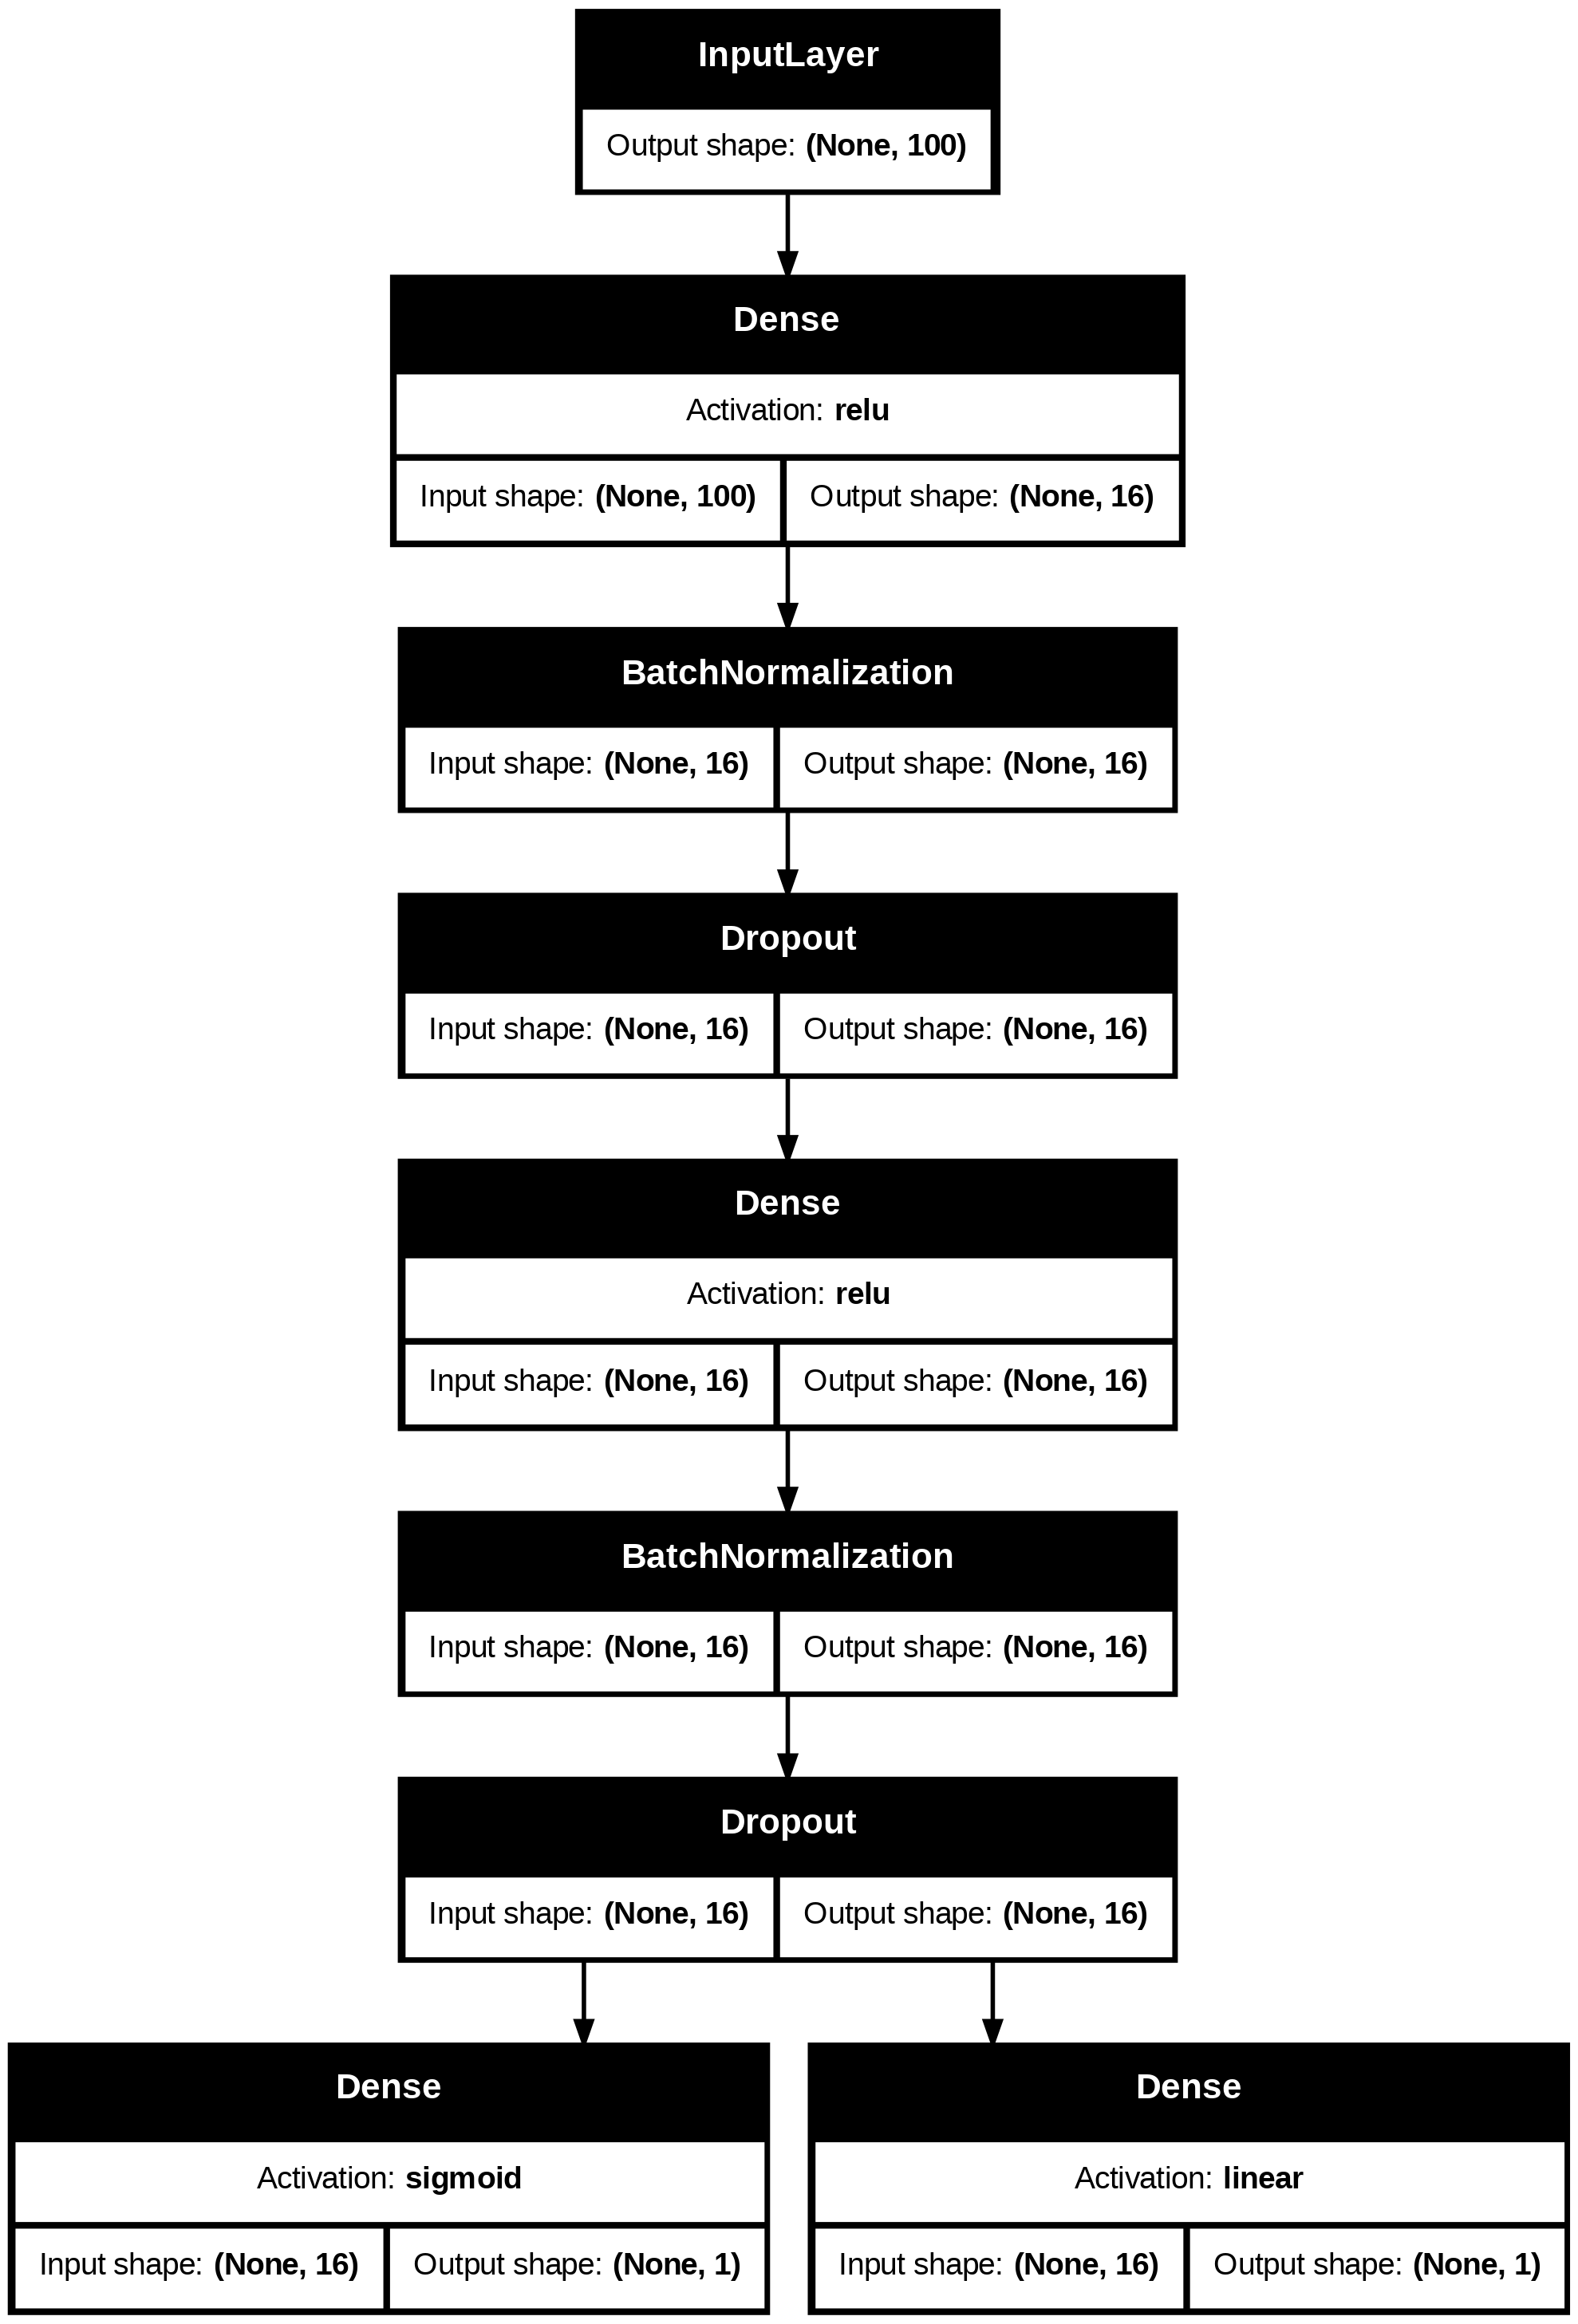

In [ ]:
plot_model(model, show_layer_activations=True, show_shapes=True)

## Features extraction

In [ ]:
X_train_nn = train_df_model.copy().drop(columns=['efs_time', 'efs', 'weights_col', 'year_hct_missing', 'age_at_hct_missing', 'FK_missing', 'CSA_missing',
                                                 'MMF_missing', 'MTX_missing', 'PTCy_missing', 'TCD_missing', 'CD34_missing', 'others_missing'])
X_valid_nn = valid_df_model.copy().drop(columns=['efs_time', 'efs', 'CSA_missing', 'year_hct_missing', 'age_at_hct_missing', 'FK_missing',
                                                 'MMF_missing', 'MTX_missing', 'PTCy_missing', 'TCD_missing', 'CD34_missing', 'others_missing'])
X_test_nn = test_df_model.copy().drop(columns=['efs_time', 'efs', 'CSA_missing', 'year_hct_missing', 'age_at_hct_missing', 'FK_missing',
                                               'MMF_missing', 'MTX_missing', 'PTCy_missing', 'TCD_missing', 'CD34_missing', 'others_missing'])

weights_col = train_df_model.copy()['weights_col'].astype('float32').to_numpy().reshape(-1)

In [ ]:
weights_col.shape

(17280,)

In [ ]:
classification_weights = weights_col.copy()
regression_weights = weights_col.copy()

sample_weights = {'classification': classification_weights, 'regression': regression_weights}

In [ ]:
X_train_nn = X_train_nn.astype('float32')
X_valid_nn = X_valid_nn.astype('float32')
X_test_nn = X_test_nn.astype('float32')

In [ ]:
X_train_nn.shape, X_valid_nn.shape, X_test_nn.shape

((17280, 100), (5760, 100), (5760, 100))

In [ ]:
y_train_nn_efs = train_df_model.copy()['efs'].astype('int32').to_numpy().reshape(-1, 1)
y_train_nn_efs_time = train_df_model.copy()['efs_time'].astype('float32').to_numpy().reshape(-1, 1)

y_valid_nn_efs = valid_df_model.copy()['efs'].astype('int32').to_numpy().reshape(-1, 1)
y_valid_nn_efs_time = valid_df_model.copy()['efs_time'].astype('float32').to_numpy().reshape(-1, 1)

y_test_nn_efs = test_df_model.copy()['efs'].astype('int32').to_numpy().reshape(-1, 1)
y_test_nn_efs_time = test_df_model.copy()['efs_time'].astype('float32').to_numpy().reshape(-1, 1)

y_train_nn_efs.shape, y_train_nn_efs_time.shape, y_valid_nn_efs.shape, y_valid_nn_efs_time.shape, y_test_nn_efs.shape, y_test_nn_efs_time.shape

((17280, 1), (17280, 1), (5760, 1), (5760, 1), (5760, 1), (5760, 1))

In [ ]:
y_train_nn_efs_time.mean(), y_train_nn_efs_time.std()

(np.float32(23.322626), np.float32(24.93844))

In [ ]:
scalerY = MinMaxScaler()

y_train_nn_efs_time_scaled = scalerY.fit_transform(y_train_nn_efs_time)
y_valid_nn_efs_time_scaled = scalerY.transform(y_valid_nn_efs_time)
y_test_nn_efs_time_scaled = scalerY.transform(y_test_nn_efs_time)

In [ ]:
# Define the EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define the ModelCheckpoint callback to save the best model weights
model_checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

In [ ]:
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [ ]:
# Train the multi-output model
history = model.fit(
    X_train_nn,
    {'classification': y_train_nn_efs, 'regression': y_train_nn_efs_time_scaled},
    epochs=50,
    batch_size=64,
    validation_data=(
        X_valid_nn,
        {'classification': y_valid_nn_efs, 'regression': y_valid_nn_efs_time_scaled}
    ),
    callbacks=[early_stopping_callback, model_checkpoint_callback]
)

Epoch 1/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - classification_f1_score: 0.4939 - classification_loss: 0.7971 - loss: 1.3759 - regression_loss: 0.5788 - regression_mae: 0.5550

270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 128ms/step - classification_f1_score: 0.4941 - classification_loss: 0.7969 - loss: 1.3750 - regression_loss: 0.5781 - regression_mae: 0.5546 - val_classification_f1_score: 0.6573 - val_classification_loss: 0.6703 - val_loss: 0.7044 - val_regression_loss: 0.0341 - val_regression_mae: 0.1419
Epoch 2/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - classification_f1_score: 0.6205 - classification_loss: 0.6792 - loss: 0.8254 - regression_loss: 0.1462 - regression_mae: 0.2801

270/270 ━━━━━━━━━━━━━━━━━━━━ 37s 136ms/step - classification_f1_score: 0.6206 - classification_loss: 0.6791 - loss: 0.8253 - regression_loss: 0.1461 - regression_mae: 0.2800 - val_classification_f1_score: 0.6941 - val_classification_loss: 0.6447 - val_loss: 0.6725 - val_regression_loss: 0.0277 - val_regression_mae: 0.1254
Epoch 3/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - classification_f1_score: 0.6570 - classification_loss: 0.6557 - loss: 0.7261 - regression_loss: 0.0704 - regression_mae: 0.1973

270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 130ms/step - classification_f1_score: 0.6570 - classification_loss: 0.6557 - loss: 0.7260 - regression_loss: 0.0704 - regression_mae: 0.1972 - val_classification_f1_score: 0.7083 - val_classification_loss: 0.6293 - val_loss: 0.6542 - val_regression_loss: 0.0249 - val_regression_mae: 0.1164
Epoch 4/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - classification_f1_score: 0.6876 - classification_loss: 0.6364 - loss: 0.6784 - regression_loss: 0.0420 - regression_mae: 0.1551

270/270 ━━━━━━━━━━━━━━━━━━━━ 34s 125ms/step - classification_f1_score: 0.6876 - classification_loss: 0.6364 - loss: 0.6784 - regression_loss: 0.0420 - regression_mae: 0.1550 - val_classification_f1_score: 0.6995 - val_classification_loss: 0.6188 - val_loss: 0.6425 - val_regression_loss: 0.0237 - val_regression_mae: 0.1171
Epoch 5/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - classification_f1_score: 0.6837 - classification_loss: 0.6343 - loss: 0.6662 - regression_loss: 0.0320 - regression_mae: 0.1348

270/270 ━━━━━━━━━━━━━━━━━━━━ 36s 133ms/step - classification_f1_score: 0.6837 - classification_loss: 0.6343 - loss: 0.6662 - regression_loss: 0.0319 - regression_mae: 0.1348 - val_classification_f1_score: 0.7031 - val_classification_loss: 0.6131 - val_loss: 0.6364 - val_regression_loss: 0.0233 - val_regression_mae: 0.1139
Epoch 6/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - classification_f1_score: 0.6864 - classification_loss: 0.6279 - loss: 0.6551 - regression_loss: 0.0272 - regression_mae: 0.1245

270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 131ms/step - classification_f1_score: 0.6865 - classification_loss: 0.6279 - loss: 0.6551 - regression_loss: 0.0272 - regression_mae: 0.1244 - val_classification_f1_score: 0.7100 - val_classification_loss: 0.6104 - val_loss: 0.6335 - val_regression_loss: 0.0232 - val_regression_mae: 0.1163
Epoch 7/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - classification_f1_score: 0.6956 - classification_loss: 0.6217 - loss: 0.6469 - regression_loss: 0.0252 - regression_mae: 0.1200

270/270 ━━━━━━━━━━━━━━━━━━━━ 34s 125ms/step - classification_f1_score: 0.6956 - classification_loss: 0.6217 - loss: 0.6469 - regression_loss: 0.0252 - regression_mae: 0.1200 - val_classification_f1_score: 0.7127 - val_classification_loss: 0.6096 - val_loss: 0.6328 - val_regression_loss: 0.0232 - val_regression_mae: 0.1169
Epoch 8/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - classification_f1_score: 0.6945 - classification_loss: 0.6152 - loss: 0.6403 - regression_loss: 0.0252 - regression_mae: 0.1197

270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 129ms/step - classification_f1_score: 0.6945 - classification_loss: 0.6152 - loss: 0.6404 - regression_loss: 0.0252 - regression_mae: 0.1197 - val_classification_f1_score: 0.6941 - val_classification_loss: 0.6091 - val_loss: 0.6323 - val_regression_loss: 0.0233 - val_regression_mae: 0.1178
Epoch 9/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - classification_f1_score: 0.7070 - classification_loss: 0.6127 - loss: 0.6364 - regression_loss: 0.0238 - regression_mae: 0.1158

270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 130ms/step - classification_f1_score: 0.7070 - classification_loss: 0.6127 - loss: 0.6364 - regression_loss: 0.0238 - regression_mae: 0.1158 - val_classification_f1_score: 0.7061 - val_classification_loss: 0.6075 - val_loss: 0.6307 - val_regression_loss: 0.0233 - val_regression_mae: 0.1188
Epoch 10/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - classification_f1_score: 0.7071 - classification_loss: 0.6092 - loss: 0.6335 - regression_loss: 0.0243 - regression_mae: 0.1177

270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 128ms/step - classification_f1_score: 0.7071 - classification_loss: 0.6092 - loss: 0.6335 - regression_loss: 0.0243 - regression_mae: 0.1177 - val_classification_f1_score: 0.7106 - val_classification_loss: 0.6067 - val_loss: 0.6298 - val_regression_loss: 0.0231 - val_regression_mae: 0.1164
Epoch 11/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 34s 125ms/step - classification_f1_score: 0.7075 - classification_loss: 0.6093 - loss: 0.6338 - regression_loss: 0.0246 - regression_mae: 0.1183 - val_classification_f1_score: 0.7015 - val_classification_loss: 0.6070 - val_loss: 0.6302 - val_regression_loss: 0.0232 - val_regression_mae: 0.1175
Epoch 12/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 34s 126ms/step - classification_f1_score: 0.6995 - classification_loss: 0.6112 - loss: 0.6359 - regression_loss: 0.0248 - regression_mae: 0.1193 - val_classification_f1_score: 0.7105 - val_classification_loss: 0.6068 - val_loss: 0.6299 - val_regression_loss: 0.0230 - val_regression_mae: 0.1117
Epoc

In [ ]:
history.history

{'classification_f1_score': [0.5423265099525452,
  0.6295433044433594,
  0.6618178486824036,
  0.682348370552063,
  0.6860820651054382,
  0.6936046481132507,
  0.6968203186988831,
  0.6967070698738098,
  0.7022688984870911,
  0.7024109363555908,
  0.7053658366203308,
  0.7025849223136902,
  0.7050195932388306,
  0.7018599510192871,
  0.7077460289001465],
 'classification_loss': [0.7453773021697998,
  0.6765410304069519,
  0.6518453359603882,
  0.6363584995269775,
  0.6303306221961975,
  0.6216232776641846,
  0.6183367371559143,
  0.6168038249015808,
  0.6134483218193054,
  0.6100278496742249,
  0.6102376580238342,
  0.6097618341445923,
  0.6099284291267395,
  0.6119542717933655,
  0.6066256761550903],
 'loss': [1.131616234779358,
  0.7992551326751709,
  0.7131854295730591,
  0.6752337217330933,
  0.6601695418357849,
  0.6480605602264404,
  0.6434751152992249,
  0.6414561867713928,
  0.6379167437553406,
  0.6344166398048401,
  0.6345815062522888,
  0.634090781211853,
  0.634288668632507

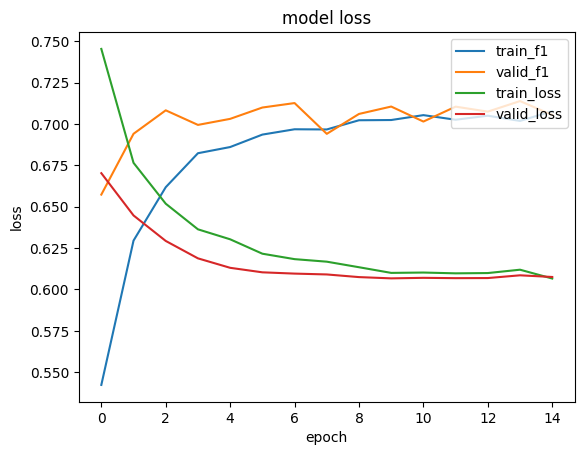

In [ ]:
plt.plot(history.history['classification_f1_score'])
plt.plot(history.history['val_classification_f1_score'])
plt.plot(history.history['classification_loss'])
plt.plot(history.history['val_classification_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_f1', 'valid_f1', 'train_loss', 'valid_loss'], loc='upper right')
plt.show()

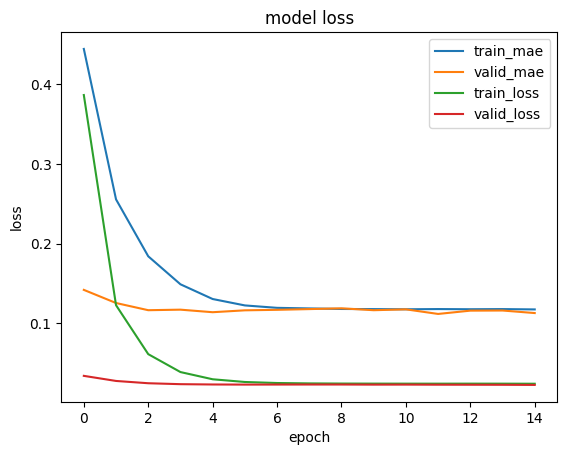

In [ ]:
plt.plot(history.history['regression_mae'])
plt.plot(history.history['val_regression_mae'])
plt.plot(history.history['regression_loss'])
plt.plot(history.history['val_regression_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_mae', 'valid_mae', 'train_loss', 'valid_loss'], loc='upper right')
plt.show()

In [ ]:
y_train_pred = model.predict(X_train_nn)
y_valid_pred = model.predict(X_valid_nn)
y_test_pred = model.predict(X_test_nn)

540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


In [ ]:
y_train_pred_prob, y_train_pred_time_std = y_train_pred[0], y_train_pred[1]
y_valid_pred_prob, y_valid_pred_time_std = y_valid_pred[0], y_valid_pred[1]
y_test_pred_prob, y_test_pred_time_std = y_test_pred[0], y_test_pred[1]

In [ ]:
y_train_pred_time = scalerY.inverse_transform(y_train_pred_time_std)
y_valid_pred_time = scalerY.inverse_transform(y_valid_pred_time_std)
y_test_pred_time = scalerY.inverse_transform(y_test_pred_time_std)

In [ ]:
train_rank_score = y_train_pred_prob / y_train_pred_time
valid_rank_score = y_valid_pred_prob / y_valid_pred_time
test_rank_score = y_test_pred_prob / y_test_pred_time

train_rank_score = train_rank_score.flatten()
valid_rank_score = valid_rank_score.flatten()
test_rank_score = test_rank_score.flatten()

In [ ]:
train_idx = train_df_model['efs'].index
valid_idx = valid_df_model['efs'].index
test_idx = test_df_model['efs'].index

In [ ]:
# prompt: write a function that attach index train_idx back to each row of train_rank_score

import pandas as pd

def attach_index_to_rows(train_rank_score, train_idx):
  """Attaches the index 'train_idx' back to each row of 'train_rank_score'."""
  train_rank_score_with_idx = pd.DataFrame({'rank_score': train_rank_score}, index=train_idx)
  return train_rank_score_with_idx

# Example usage:
train_rank_score_with_idx = attach_index_to_rows(train_rank_score, train_idx)
valid_rank_score_with_idx = attach_index_to_rows(valid_rank_score, valid_idx)
test_rank_score_with_idx = attach_index_to_rows(test_rank_score, test_idx)

In [ ]:
def calculate_stratified_concordance_index_v2(df_model, data, strata_column, predicted_risk_scores):
    """Calculates the stratified concordance index.

    Args:
        cph_model: A fitted CoxPHFitter model.
        data: A pandas DataFrame containing the data.
        strata_column: The name of the column to stratify by.

    Returns:
        The stratified concordance index.
    """
    concordance_indices = np.array([])
    for stratum_value in data[strata_column].unique():
      stratum_data_idx = data[data[strata_column] == stratum_value].index
      stratum_data = data.loc[stratum_data_idx]
      predicted_risk_scores_stratum = predicted_risk_scores.loc[stratum_data_idx]

      # Calculate concordance index for the stratum
      c_index = concordance_index(stratum_data['efs_time'], -predicted_risk_scores_stratum, stratum_data['efs']) # negate for concordance
      concordance_indices = np.append(concordance_indices, c_index)

    # Calculate the weighted average concordance index
    stratified_c_index = float(np.mean(concordance_indices) - np.std(concordance_indices))
    return stratified_c_index, concordance_indices

train_strat_ci_nn, train_cis_nn = calculate_stratified_concordance_index_v2(train_df_model, train_data, 'race_group', train_rank_score_with_idx)
valid_strat_ci_nn, valid_cis_nn = calculate_stratified_concordance_index_v2(valid_df_model, valid_data, 'race_group', valid_rank_score_with_idx)
test_strat_ci_nn, test_cis_nn = calculate_stratified_concordance_index_v2(test_df_model, test_data, 'race_group', test_rank_score_with_idx)

In [ ]:
train_strat_ci_nn, train_cis_nn

(0.6344443668771809,
 array([0.65961284, 0.64241911, 0.65117847, 0.63672328, 0.65185503,
        0.62797785]))

In [ ]:
valid_strat_ci_nn, valid_cis_nn

(0.6298586684353803,
 array([0.64789206, 0.61897994, 0.64941605, 0.63285944, 0.6570496 ,
        0.65012897]))

In [ ]:
test_strat_ci_nn, test_cis_nn

(0.6238279891912418,
 array([0.63649573, 0.65466212, 0.65783322, 0.62414579, 0.6731967 ,
        0.616177  ]))

# Neural Network (Shared Layers) with Sample Weights

In [ ]:
def build_model_v1(input_dim=110):
    # Define input layer
    input_layer = layers.Input(shape=(input_dim,))

    # Shared hidden layers with BatchNormalization and Dropout
    x = layers.Dense(16, activation='relu', name="shared1")(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Additional shared hidden layer
    x = layers.Dense(16, activation='relu', name="shared2")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Classification output (Sigmoid for binary classification)
    classification = layers.Dense(1, activation='sigmoid', name="classification")(x)

    # Regression output (Linear activation for continuous values)
    regression = layers.Dense(1, name="regression")(x)

    # Create model using functional API
    multi_output_model = keras.Model(inputs=input_layer, outputs=[classification, regression])

    # Compile the model
    multi_output_model.compile(optimizer='adam',
                               loss={'classification': 'binary_crossentropy', 'regression': 'mse'},
                               metrics={'classification': f1_score, 'regression': 'mae'})

    return multi_output_model

# Example usage
model2 = build_model_v1(input_dim=100)
model2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ shared1 (Dense)           │ (None, 16)             │          1,616 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 16)             │             64 │ shared1[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 16)             │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ shared2 (Dense)           │ (None, 16)             │            272 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 16)             │             64 │ shared2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 16)             │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ classification (Dense)    │ (None, 1)              │             17 │ dropout_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ regression (Dense)        │ (None, 1)              │             17 │ dropout_5[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,050 (8.01 KB)

 Trainable params: 1,986 (7.76 KB)

 Non-trainable params: 64 (256.00 B)

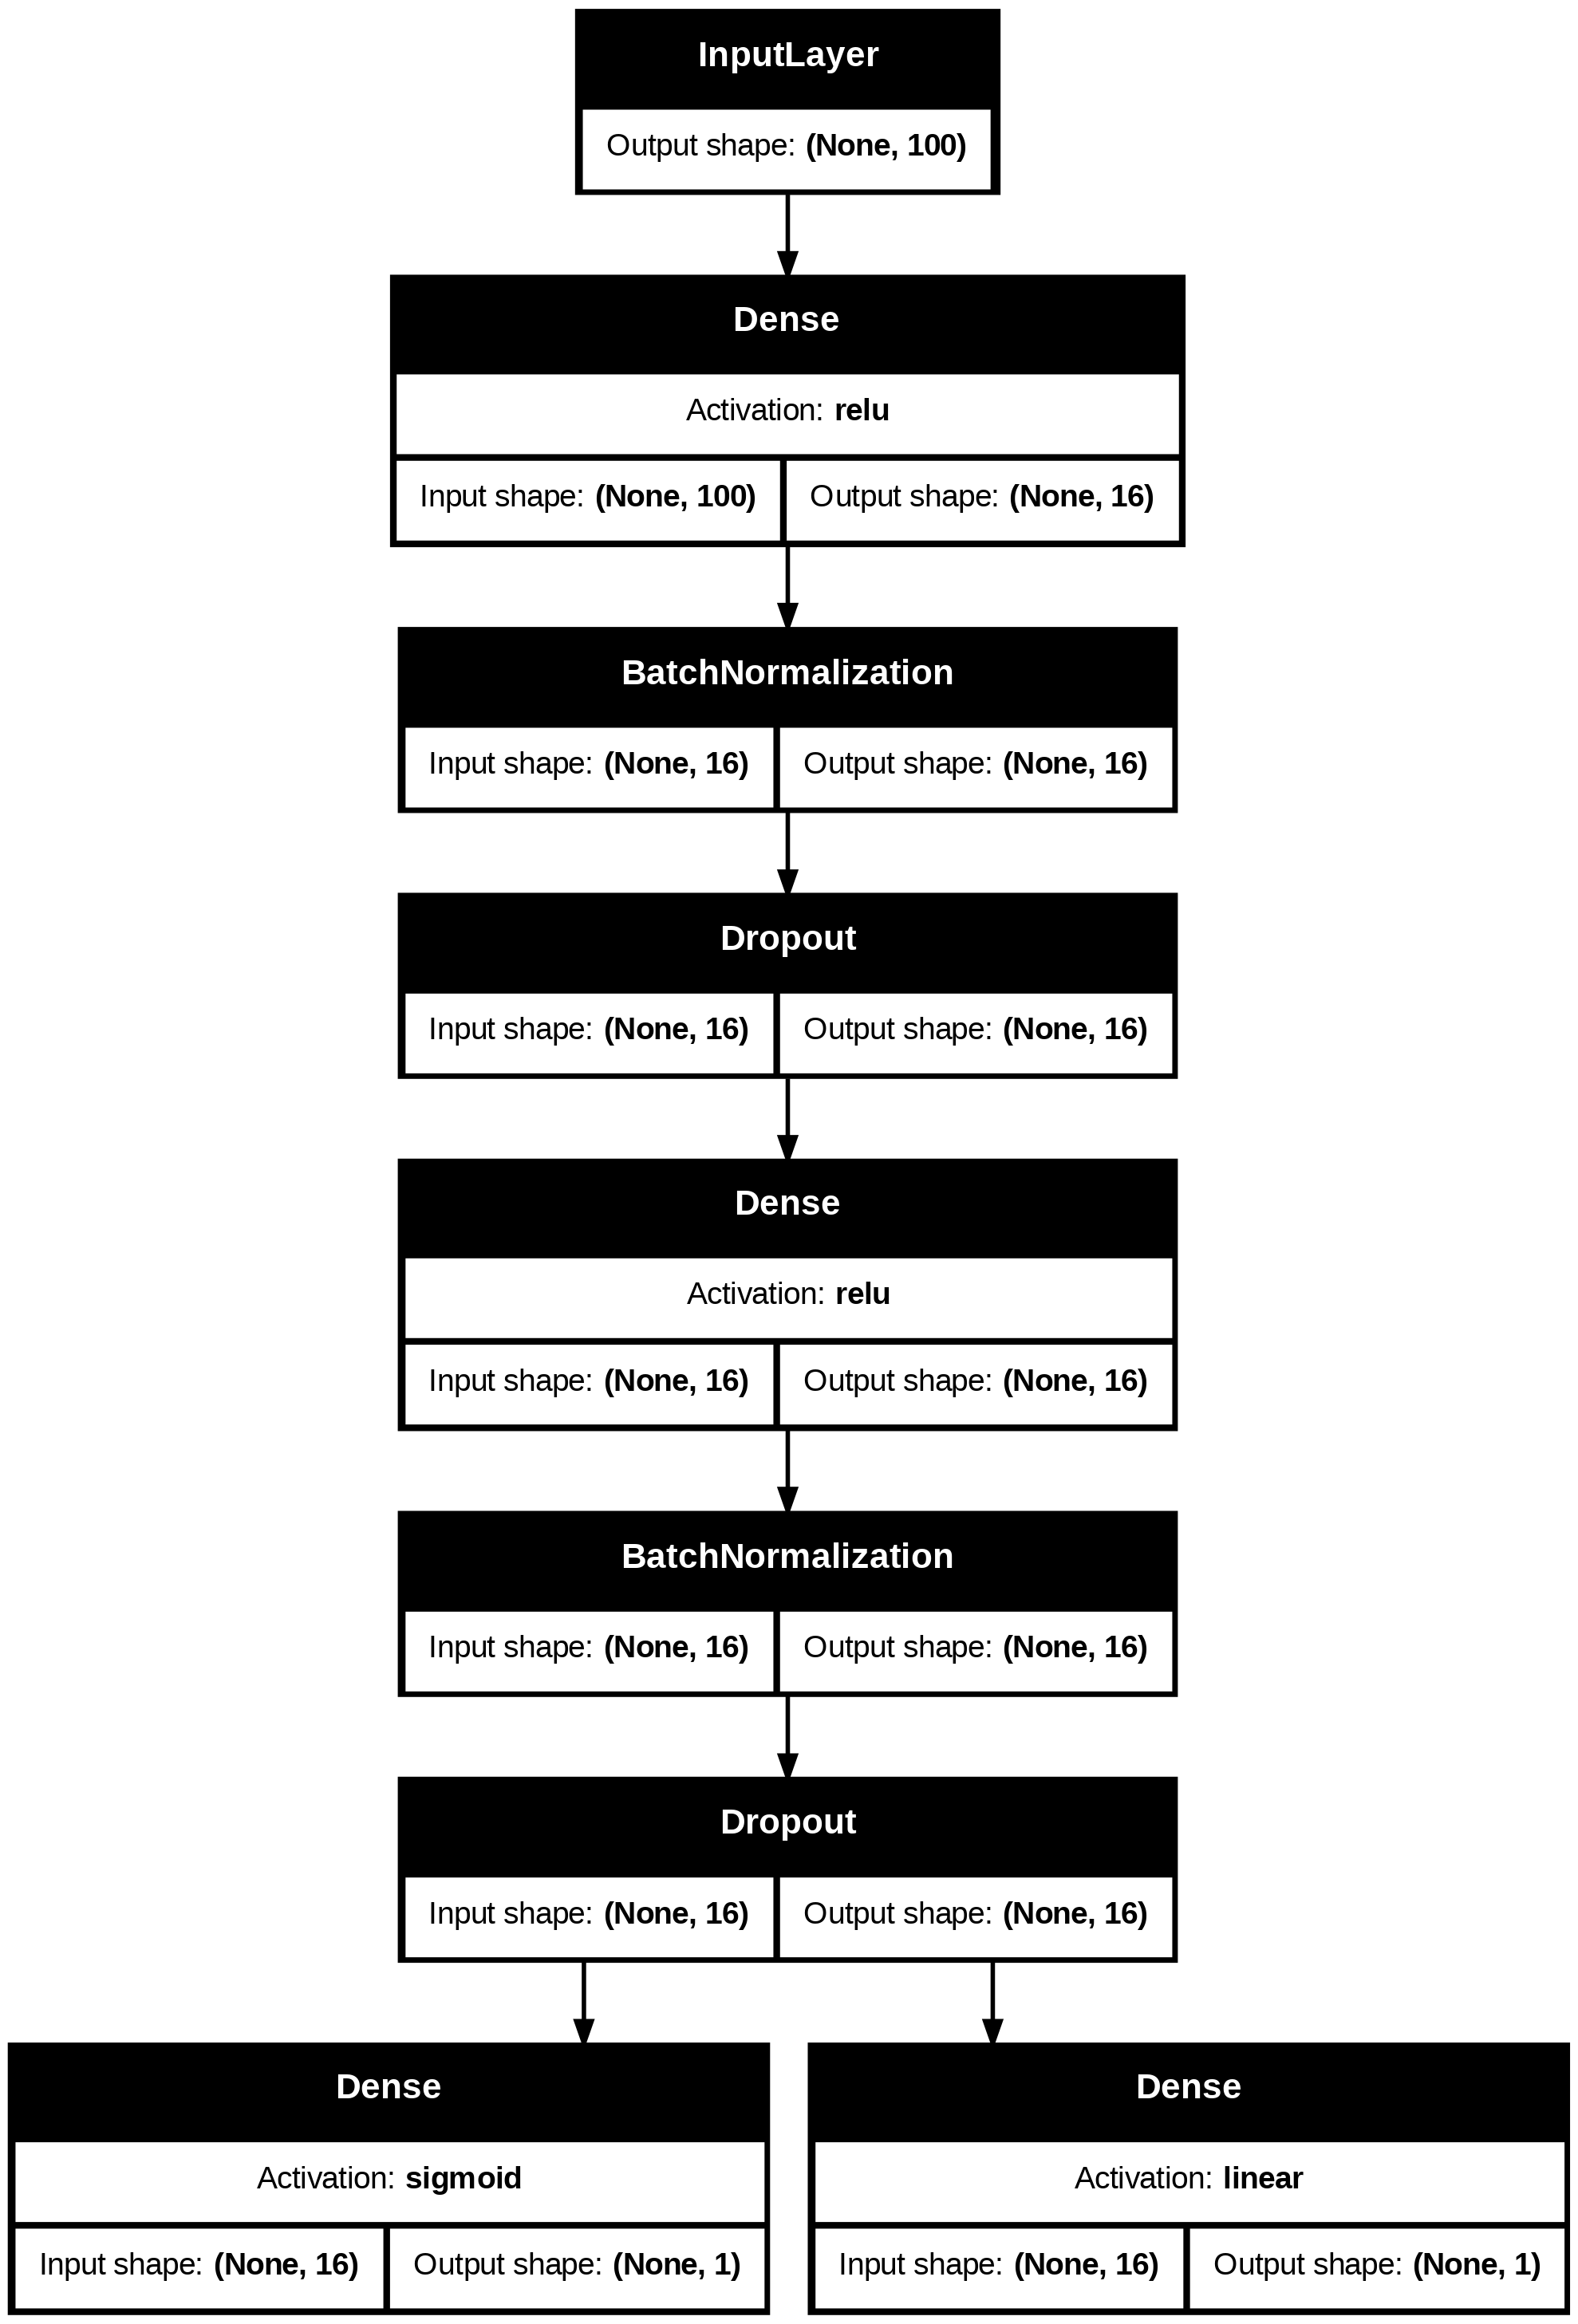

In [ ]:
plot_model(model2, show_layer_activations=True, show_shapes=True)

## Features extraction

In [ ]:
X_train_nn = train_df_model.copy().drop(columns=['efs_time', 'efs', 'weights_col', 'year_hct_missing', 'age_at_hct_missing', 'FK_missing', 'CSA_missing',
                                                 'MMF_missing', 'MTX_missing', 'PTCy_missing', 'TCD_missing', 'CD34_missing', 'others_missing'])
X_valid_nn = valid_df_model.copy().drop(columns=['efs_time', 'efs', 'year_hct_missing', 'age_at_hct_missing', 'FK_missing', 'CSA_missing',
                                                 'MMF_missing', 'MTX_missing', 'PTCy_missing', 'TCD_missing', 'CD34_missing', 'others_missing'])
X_test_nn = test_df_model.copy().drop(columns=['efs_time', 'efs', 'year_hct_missing', 'age_at_hct_missing', 'FK_missing', 'CSA_missing',
                                               'MMF_missing', 'MTX_missing', 'PTCy_missing', 'TCD_missing', 'CD34_missing', 'others_missing'])

weights_col = train_df_model.copy()['weights_col'].astype('float32').to_numpy().reshape(-1)

In [ ]:
weights_col.shape

(17280,)

In [ ]:
X_train_nn = X_train_nn.astype('float32')
X_valid_nn = X_valid_nn.astype('float32')
X_test_nn = X_test_nn.astype('float32')

In [ ]:
X_train_nn.shape, X_valid_nn.shape, X_test_nn.shape

((17280, 100), (5760, 100), (5760, 100))

In [ ]:
y_train_nn_efs = train_df_model.copy()['efs'].astype('int32').to_numpy().reshape(-1, 1)
y_train_nn_efs_time = train_df_model.copy()['efs_time'].astype('float32').to_numpy().reshape(-1, 1)

y_valid_nn_efs = valid_df_model.copy()['efs'].astype('int32').to_numpy().reshape(-1, 1)
y_valid_nn_efs_time = valid_df_model.copy()['efs_time'].astype('float32').to_numpy().reshape(-1, 1)

y_test_nn_efs = test_df_model.copy()['efs'].astype('int32').to_numpy().reshape(-1, 1)
y_test_nn_efs_time = test_df_model.copy()['efs_time'].astype('float32').to_numpy().reshape(-1, 1)

y_train_nn_efs.shape, y_train_nn_efs_time.shape, y_valid_nn_efs.shape, y_valid_nn_efs_time.shape, y_test_nn_efs.shape, y_test_nn_efs_time.shape

((17280, 1), (17280, 1), (5760, 1), (5760, 1), (5760, 1), (5760, 1))

In [ ]:
y_train_nn_efs_time.mean(), y_train_nn_efs_time.std()

(np.float32(23.322626), np.float32(24.93844))

In [ ]:
scalerY = MinMaxScaler()

y_train_nn_efs_time_scaled = scalerY.fit_transform(y_train_nn_efs_time)
y_valid_nn_efs_time_scaled = scalerY.transform(y_valid_nn_efs_time)
y_test_nn_efs_time_scaled = scalerY.transform(y_test_nn_efs_time)

In [ ]:
# Define the EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define the ModelCheckpoint callback to save the best model weights
model_checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

In [ ]:
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [ ]:
# Train the multi-output model
history2 = model2.fit(
    X_train_nn,
    [y_train_nn_efs, y_train_nn_efs_time_scaled],
    sample_weight=weights_col,
    epochs=50,
    batch_size=64,
    validation_data=(
        X_valid_nn,
        [y_valid_nn_efs, y_valid_nn_efs_time_scaled]
    ),
    callbacks=[early_stopping_callback, model_checkpoint_callback]
)

Epoch 1/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - classification_f1_score: 0.5273 - classification_loss: 0.8513 - loss: 1.6101 - regression_loss: 0.7588 - regression_mae: 0.6397

270/270 ━━━━━━━━━━━━━━━━━━━━ 37s 136ms/step - classification_f1_score: 0.5275 - classification_loss: 0.8510 - loss: 1.6088 - regression_loss: 0.7578 - regression_mae: 0.6392 - val_classification_f1_score: 0.6698 - val_classification_loss: 0.6684 - val_loss: 0.7149 - val_regression_loss: 0.0465 - val_regression_mae: 0.1654
Epoch 2/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - classification_f1_score: 0.6183 - classification_loss: 0.6891 - loss: 0.8554 - regression_loss: 0.1663 - regression_mae: 0.3107

270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 129ms/step - classification_f1_score: 0.6184 - classification_loss: 0.6890 - loss: 0.8552 - regression_loss: 0.1662 - regression_mae: 0.3106 - val_classification_f1_score: 0.6790 - val_classification_loss: 0.6454 - val_loss: 0.6761 - val_regression_loss: 0.0308 - val_regression_mae: 0.1319
Epoch 3/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - classification_f1_score: 0.6577 - classification_loss: 0.6562 - loss: 0.7342 - regression_loss: 0.0780 - regression_mae: 0.2157

270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 130ms/step - classification_f1_score: 0.6577 - classification_loss: 0.6562 - loss: 0.7342 - regression_loss: 0.0780 - regression_mae: 0.2157 - val_classification_f1_score: 0.6881 - val_classification_loss: 0.6303 - val_loss: 0.6561 - val_regression_loss: 0.0258 - val_regression_mae: 0.1232
Epoch 4/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - classification_f1_score: 0.6723 - classification_loss: 0.6406 - loss: 0.6877 - regression_loss: 0.0471 - regression_mae: 0.1671

270/270 ━━━━━━━━━━━━━━━━━━━━ 37s 138ms/step - classification_f1_score: 0.6723 - classification_loss: 0.6406 - loss: 0.6877 - regression_loss: 0.0470 - regression_mae: 0.1670 - val_classification_f1_score: 0.6857 - val_classification_loss: 0.6223 - val_loss: 0.6464 - val_regression_loss: 0.0241 - val_regression_mae: 0.1171
Epoch 5/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - classification_f1_score: 0.6848 - classification_loss: 0.6309 - loss: 0.6642 - regression_loss: 0.0334 - regression_mae: 0.1395

270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 130ms/step - classification_f1_score: 0.6848 - classification_loss: 0.6309 - loss: 0.6642 - regression_loss: 0.0333 - regression_mae: 0.1395 - val_classification_f1_score: 0.6964 - val_classification_loss: 0.6154 - val_loss: 0.6388 - val_regression_loss: 0.0234 - val_regression_mae: 0.1170
Epoch 6/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - classification_f1_score: 0.6976 - classification_loss: 0.6192 - loss: 0.6471 - regression_loss: 0.0279 - regression_mae: 0.1259

270/270 ━━━━━━━━━━━━━━━━━━━━ 34s 124ms/step - classification_f1_score: 0.6975 - classification_loss: 0.6192 - loss: 0.6471 - regression_loss: 0.0279 - regression_mae: 0.1259 - val_classification_f1_score: 0.7027 - val_classification_loss: 0.6128 - val_loss: 0.6361 - val_regression_loss: 0.0233 - val_regression_mae: 0.1161
Epoch 7/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - classification_f1_score: 0.6966 - classification_loss: 0.6196 - loss: 0.6458 - regression_loss: 0.0262 - regression_mae: 0.1219

270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 129ms/step - classification_f1_score: 0.6966 - classification_loss: 0.6196 - loss: 0.6458 - regression_loss: 0.0262 - regression_mae: 0.1219 - val_classification_f1_score: 0.7056 - val_classification_loss: 0.6118 - val_loss: 0.6348 - val_regression_loss: 0.0230 - val_regression_mae: 0.1122
Epoch 8/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 34s 127ms/step - classification_f1_score: 0.7149 - classification_loss: 0.6069 - loss: 0.6314 - regression_loss: 0.0246 - regression_mae: 0.1164 - val_classification_f1_score: 0.6876 - val_classification_loss: 0.6130 - val_loss: 0.6361 - val_regression_loss: 0.0231 - val_regression_mae: 0.1183
Epoch 9/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - classification_f1_score: 0.6982 - classification_loss: 0.6156 - loss: 0.6405 - regression_loss: 0.0250 - regression_mae: 0.1190

270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 128ms/step - classification_f1_score: 0.6982 - classification_loss: 0.6156 - loss: 0.6405 - regression_loss: 0.0250 - regression_mae: 0.1190 - val_classification_f1_score: 0.7129 - val_classification_loss: 0.6096 - val_loss: 0.6325 - val_regression_loss: 0.0229 - val_regression_mae: 0.1139
Epoch 10/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 34s 125ms/step - classification_f1_score: 0.7040 - classification_loss: 0.6150 - loss: 0.6393 - regression_loss: 0.0243 - regression_mae: 0.1172 - val_classification_f1_score: 0.7169 - val_classification_loss: 0.6116 - val_loss: 0.6345 - val_regression_loss: 0.0229 - val_regression_mae: 0.1109
Epoch 11/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 128ms/step - classification_f1_score: 0.7040 - classification_loss: 0.6140 - loss: 0.6382 - regression_loss: 0.0242 - regression_mae: 0.1169 - val_classification_f1_score: 0.7047 - val_classification_loss: 0.6105 - val_loss: 0.6333 - val_regression_loss: 0.0228 - val_regression_mae: 0.1136
Epoc

270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 129ms/step - classification_f1_score: 0.7072 - classification_loss: 0.6101 - loss: 0.6344 - regression_loss: 0.0243 - regression_mae: 0.1176 - val_classification_f1_score: 0.7016 - val_classification_loss: 0.6090 - val_loss: 0.6318 - val_regression_loss: 0.0228 - val_regression_mae: 0.1124
Epoch 13/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - classification_f1_score: 0.7087 - classification_loss: 0.6046 - loss: 0.6295 - regression_loss: 0.0249 - regression_mae: 0.1175

270/270 ━━━━━━━━━━━━━━━━━━━━ 36s 132ms/step - classification_f1_score: 0.7087 - classification_loss: 0.6046 - loss: 0.6295 - regression_loss: 0.0249 - regression_mae: 0.1175 - val_classification_f1_score: 0.7095 - val_classification_loss: 0.6085 - val_loss: 0.6313 - val_regression_loss: 0.0228 - val_regression_mae: 0.1151
Epoch 14/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - classification_f1_score: 0.7071 - classification_loss: 0.6124 - loss: 0.6372 - regression_loss: 0.0248 - regression_mae: 0.1184

270/270 ━━━━━━━━━━━━━━━━━━━━ 34s 125ms/step - classification_f1_score: 0.7071 - classification_loss: 0.6124 - loss: 0.6372 - regression_loss: 0.0248 - regression_mae: 0.1184 - val_classification_f1_score: 0.7045 - val_classification_loss: 0.6084 - val_loss: 0.6311 - val_regression_loss: 0.0227 - val_regression_mae: 0.1114
Epoch 15/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - classification_f1_score: 0.7109 - classification_loss: 0.6040 - loss: 0.6282 - regression_loss: 0.0242 - regression_mae: 0.1161

270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 128ms/step - classification_f1_score: 0.7109 - classification_loss: 0.6041 - loss: 0.6283 - regression_loss: 0.0242 - regression_mae: 0.1161 - val_classification_f1_score: 0.7082 - val_classification_loss: 0.6078 - val_loss: 0.6306 - val_regression_loss: 0.0228 - val_regression_mae: 0.1150
Epoch 16/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 34s 128ms/step - classification_f1_score: 0.7071 - classification_loss: 0.6062 - loss: 0.6303 - regression_loss: 0.0241 - regression_mae: 0.1167 - val_classification_f1_score: 0.7078 - val_classification_loss: 0.6085 - val_loss: 0.6312 - val_regression_loss: 0.0226 - val_regression_mae: 0.1140
Epoch 17/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 130ms/step - classification_f1_score: 0.7105 - classification_loss: 0.6055 - loss: 0.6290 - regression_loss: 0.0235 - regression_mae: 0.1150 - val_classification_f1_score: 0.6951 - val_classification_loss: 0.6089 - val_loss: 0.6313 - val_regression_loss: 0.0224 - val_regression_mae: 0.1150
Epoc

270/270 ━━━━━━━━━━━━━━━━━━━━ 34s 128ms/step - classification_f1_score: 0.7043 - classification_loss: 0.6056 - loss: 0.6297 - regression_loss: 0.0241 - regression_mae: 0.1173 - val_classification_f1_score: 0.7066 - val_classification_loss: 0.6075 - val_loss: 0.6299 - val_regression_loss: 0.0224 - val_regression_mae: 0.1131
Epoch 19/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 34s 126ms/step - classification_f1_score: 0.7136 - classification_loss: 0.6051 - loss: 0.6285 - regression_loss: 0.0234 - regression_mae: 0.1154 - val_classification_f1_score: 0.6953 - val_classification_loss: 0.6079 - val_loss: 0.6300 - val_regression_loss: 0.0222 - val_regression_mae: 0.1155
Epoch 20/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 130ms/step - classification_f1_score: 0.7113 - classification_loss: 0.6018 - loss: 0.6247 - regression_loss: 0.0229 - regression_mae: 0.1141 - val_classification_f1_score: 0.7063 - val_classification_loss: 0.6079 - val_loss: 0.6300 - val_regression_loss: 0.0221 - val_regression_mae: 0.1135
Epoc

270/270 ━━━━━━━━━━━━━━━━━━━━ 34s 128ms/step - classification_f1_score: 0.7046 - classification_loss: 0.6068 - loss: 0.6301 - regression_loss: 0.0233 - regression_mae: 0.1161 - val_classification_f1_score: 0.7010 - val_classification_loss: 0.6077 - val_loss: 0.6296 - val_regression_loss: 0.0219 - val_regression_mae: 0.1142
Epoch 23/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 34s 125ms/step - classification_f1_score: 0.7184 - classification_loss: 0.5986 - loss: 0.6217 - regression_loss: 0.0230 - regression_mae: 0.1147 - val_classification_f1_score: 0.7139 - val_classification_loss: 0.6090 - val_loss: 0.6307 - val_regression_loss: 0.0217 - val_regression_mae: 0.1110
Epoch 24/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - classification_f1_score: 0.7138 - classification_loss: 0.6004 - loss: 0.6233 - regression_loss: 0.0229 - regression_mae: 0.1150

270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 129ms/step - classification_f1_score: 0.7138 - classification_loss: 0.6004 - loss: 0.6233 - regression_loss: 0.0229 - regression_mae: 0.1150 - val_classification_f1_score: 0.6985 - val_classification_loss: 0.6074 - val_loss: 0.6294 - val_regression_loss: 0.0219 - val_regression_mae: 0.1151
Epoch 25/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - classification_f1_score: 0.7077 - classification_loss: 0.5999 - loss: 0.6232 - regression_loss: 0.0233 - regression_mae: 0.1150

270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 128ms/step - classification_f1_score: 0.7077 - classification_loss: 0.5999 - loss: 0.6232 - regression_loss: 0.0233 - regression_mae: 0.1150 - val_classification_f1_score: 0.7085 - val_classification_loss: 0.6075 - val_loss: 0.6291 - val_regression_loss: 0.0217 - val_regression_mae: 0.1139
Epoch 26/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 129ms/step - classification_f1_score: 0.7115 - classification_loss: 0.6030 - loss: 0.6264 - regression_loss: 0.0234 - regression_mae: 0.1156 - val_classification_f1_score: 0.7093 - val_classification_loss: 0.6082 - val_loss: 0.6301 - val_regression_loss: 0.0219 - val_regression_mae: 0.1120
Epoch 27/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 34s 128ms/step - classification_f1_score: 0.7034 - classification_loss: 0.6019 - loss: 0.6251 - regression_loss: 0.0232 - regression_mae: 0.1149 - val_classification_f1_score: 0.7177 - val_classification_loss: 0.6106 - val_loss: 0.6322 - val_regression_loss: 0.0216 - val_regression_mae: 0.1087
Epoc

270/270 ━━━━━━━━━━━━━━━━━━━━ 36s 133ms/step - classification_f1_score: 0.7203 - classification_loss: 0.6017 - loss: 0.6245 - regression_loss: 0.0228 - regression_mae: 0.1146 - val_classification_f1_score: 0.7038 - val_classification_loss: 0.6073 - val_loss: 0.6289 - val_regression_loss: 0.0216 - val_regression_mae: 0.1095
Epoch 29/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 129ms/step - classification_f1_score: 0.7109 - classification_loss: 0.6003 - loss: 0.6234 - regression_loss: 0.0231 - regression_mae: 0.1145 - val_classification_f1_score: 0.6889 - val_classification_loss: 0.6104 - val_loss: 0.6319 - val_regression_loss: 0.0216 - val_regression_mae: 0.1127
Epoch 30/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 131ms/step - classification_f1_score: 0.7138 - classification_loss: 0.5968 - loss: 0.6196 - regression_loss: 0.0229 - regression_mae: 0.1145 - val_classification_f1_score: 0.7087 - val_classification_loss: 0.6084 - val_loss: 0.6302 - val_regression_loss: 0.0218 - val_regression_mae: 0.1123
Epoc

In [ ]:
history2.history

{'classification_f1_score': [0.564568281173706,
  0.6283652186393738,
  0.6632118225097656,
  0.6707436442375183,
  0.6878365278244019,
  0.6905116438865662,
  0.6969196200370789,
  0.7043066620826721,
  0.6997771859169006,
  0.7063371539115906,
  0.7053532004356384,
  0.7048605680465698,
  0.7064235806465149,
  0.7074316143989563,
  0.7089240550994873,
  0.708221971988678,
  0.710725724697113,
  0.7113326191902161,
  0.7093166708946228,
  0.7101247310638428,
  0.7091672420501709,
  0.7057993412017822,
  0.7108816504478455,
  0.7085057497024536,
  0.7084479928016663,
  0.7102747559547424,
  0.7068564295768738,
  0.7160371541976929,
  0.7099656462669373,
  0.7088081240653992,
  0.709355354309082,
  0.7104740738868713,
  0.7110415697097778],
 'classification_loss': [0.7792788147926331,
  0.6777787208557129,
  0.6516621112823486,
  0.640349805355072,
  0.6285305023193359,
  0.6238431930541992,
  0.6195797324180603,
  0.6147270202636719,
  0.6147146821022034,
  0.6127236485481262,
  0.6093

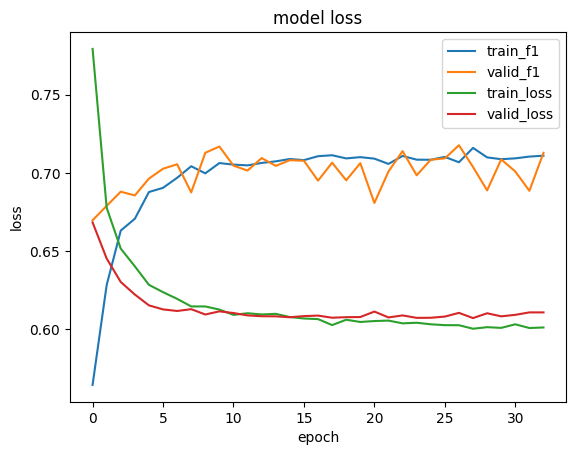

In [ ]:
plt.plot(history2.history['classification_f1_score'])
plt.plot(history2.history['val_classification_f1_score'])
plt.plot(history2.history['classification_loss'])
plt.plot(history2.history['val_classification_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_f1', 'valid_f1', 'train_loss', 'valid_loss'], loc='upper right')
plt.show()

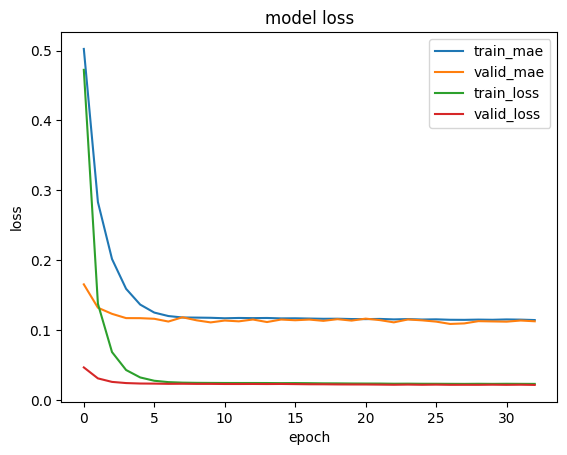

In [ ]:
plt.plot(history2.history['regression_mae'])
plt.plot(history2.history['val_regression_mae'])
plt.plot(history2.history['regression_loss'])
plt.plot(history2.history['val_regression_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_mae', 'valid_mae', 'train_loss', 'valid_loss'], loc='upper right')
plt.show()

In [ ]:
y_train_pred = model2.predict(X_train_nn)
y_valid_pred = model2.predict(X_valid_nn)
y_test_pred = model2.predict(X_test_nn)

540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


In [ ]:
y_train_pred_prob, y_train_pred_time_std = y_train_pred[0], y_train_pred[1]
y_valid_pred_prob, y_valid_pred_time_std = y_valid_pred[0], y_valid_pred[1]
y_test_pred_prob, y_test_pred_time_std = y_test_pred[0], y_test_pred[1]

In [ ]:
y_train_pred_time = scalerY.inverse_transform(y_train_pred_time_std)
y_valid_pred_time = scalerY.inverse_transform(y_valid_pred_time_std)
y_test_pred_time = scalerY.inverse_transform(y_test_pred_time_std)

In [ ]:
train_rank_score = y_train_pred_prob / y_train_pred_time
valid_rank_score = y_valid_pred_prob / y_valid_pred_time
test_rank_score = y_test_pred_prob / y_test_pred_time

train_rank_score = train_rank_score.flatten()
valid_rank_score = valid_rank_score.flatten()
test_rank_score = test_rank_score.flatten()

In [ ]:
train_idx = train_df_model['efs'].index
valid_idx = valid_df_model['efs'].index
test_idx = test_df_model['efs'].index

In [ ]:
# prompt: write a function that attach index train_idx back to each row of train_rank_score

import pandas as pd

def attach_index_to_rows(train_rank_score, train_idx):
  """Attaches the index 'train_idx' back to each row of 'train_rank_score'."""
  train_rank_score_with_idx = pd.DataFrame({'rank_score': train_rank_score}, index=train_idx)
  return train_rank_score_with_idx

# Example usage:
train_rank_score_with_idx = attach_index_to_rows(train_rank_score, train_idx)
valid_rank_score_with_idx = attach_index_to_rows(valid_rank_score, valid_idx)
test_rank_score_with_idx = attach_index_to_rows(test_rank_score, test_idx)

In [ ]:
def calculate_stratified_concordance_index_v2(df_model, data, strata_column, predicted_risk_scores):
    """Calculates the stratified concordance index.

    Args:
        cph_model: A fitted CoxPHFitter model.
        data: A pandas DataFrame containing the data.
        strata_column: The name of the column to stratify by.

    Returns:
        The stratified concordance index.
    """
    concordance_indices = np.array([])
    for stratum_value in data[strata_column].unique():
      stratum_data_idx = data[data[strata_column] == stratum_value].index
      stratum_data = data.loc[stratum_data_idx]
      predicted_risk_scores_stratum = predicted_risk_scores.loc[stratum_data_idx]

      # Calculate concordance index for the stratum
      c_index = concordance_index(stratum_data['efs_time'], -predicted_risk_scores_stratum, stratum_data['efs']) # negate for concordance
      concordance_indices = np.append(concordance_indices, c_index)

    # Calculate the weighted average concordance index
    stratified_c_index = float(np.mean(concordance_indices) - np.std(concordance_indices))
    return stratified_c_index, concordance_indices

train_strat_ci_nn, train_cis_nn = calculate_stratified_concordance_index_v2(train_df_model, train_data, 'race_group', train_rank_score_with_idx)
valid_strat_ci_nn, valid_cis_nn = calculate_stratified_concordance_index_v2(valid_df_model, valid_data, 'race_group', valid_rank_score_with_idx)
test_strat_ci_nn, test_cis_nn = calculate_stratified_concordance_index_v2(test_df_model, test_data, 'race_group', test_rank_score_with_idx)

In [ ]:
train_strat_ci_nn, train_cis_nn

(0.6358294530592484,
 array([0.66849636, 0.64647488, 0.65430771, 0.64006488, 0.65411701,
        0.62778488]))

In [ ]:
valid_strat_ci_nn, valid_cis_nn

(0.6218001623154541,
 array([0.64296628, 0.61485809, 0.64018153, 0.61887501, 0.65344219,
        0.64507564]))

In [ ]:
test_strat_ci_nn, test_cis_nn

(0.6204316204143967,
 array([0.63051095, 0.64908424, 0.65087234, 0.62478476, 0.67302294,
        0.6129342 ]))

# Neural Network (Shared Layers) with Sample Weights No Dropout

In [ ]:
def build_model_v3(input_dim=110):
    # Define input layer
    input_layer = layers.Input(shape=(input_dim,))

    # Shared hidden layers with BatchNormalization and Dropout
    x = layers.Dense(16, activation='relu', name="shared1")(input_layer)
    x = layers.BatchNormalization()(x)

    # Additional shared hidden layer
    x = layers.Dense(16, activation='relu', name="shared2")(x)
    x = layers.BatchNormalization()(x)

    # Classification output (Sigmoid for binary classification)
    classification = layers.Dense(1, activation='sigmoid', name="classification")(x)

    # Regression output (Linear activation for continuous values)
    regression = layers.Dense(1, name="regression")(x)

    # Create model using functional API
    multi_output_model = keras.Model(inputs=input_layer, outputs=[classification, regression])

    # Compile the model
    multi_output_model.compile(optimizer='adam',
                               loss={'classification': 'binary_crossentropy', 'regression': 'mse'},
                               metrics={'classification': f1_score, 'regression': 'mae'})

    return multi_output_model

# Example usage
model3 = build_model_v3(input_dim=100)
model3.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ shared1 (Dense)           │ (None, 16)             │          1,616 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 16)             │             64 │ shared1[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ shared2 (Dense)           │ (None, 16)             │            272 │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 16)             │             64 │ shared2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ classification (Dense)    │ (None, 1)              │             17 │ batch_normalization_7… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ regression (Dense)        │ (None, 1)              │             17 │ batch_normalization_7… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,050 (8.01 KB)

 Trainable params: 1,986 (7.76 KB)

 Non-trainable params: 64 (256.00 B)

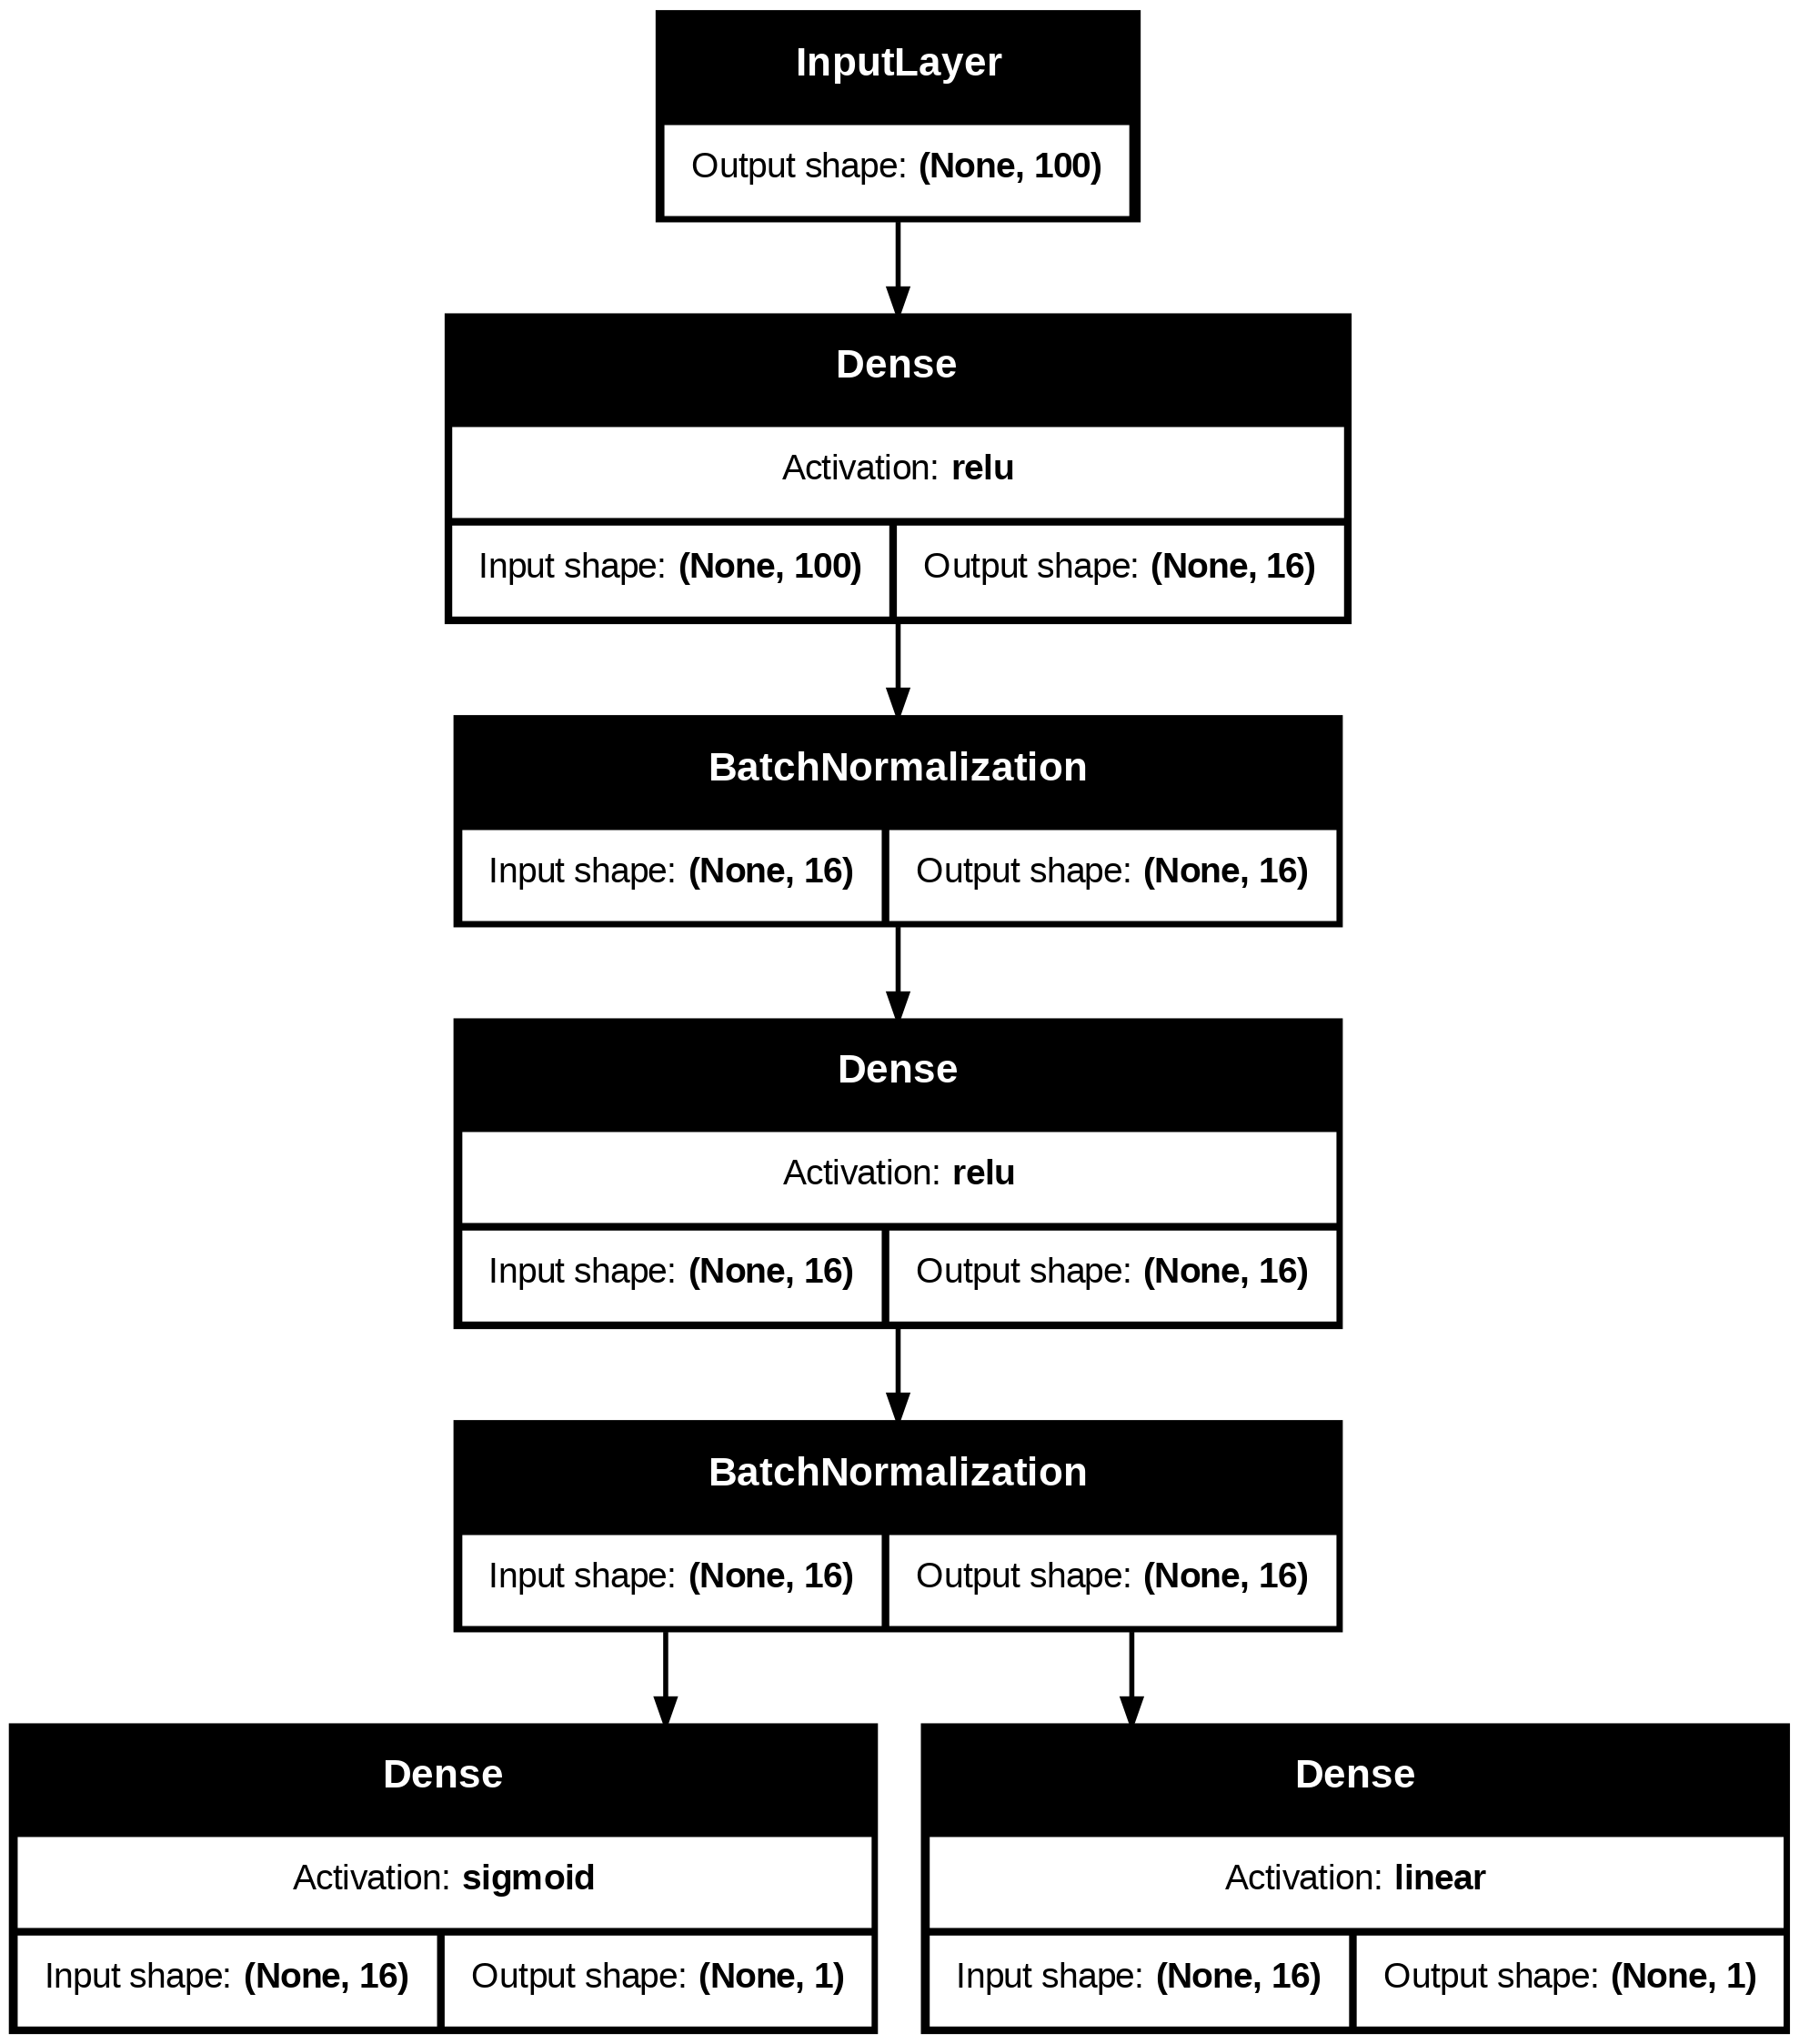

In [ ]:
plot_model(model3, show_layer_activations=True, show_shapes=True)

## Features extraction

In [ ]:
X_train_nn = train_df_model.copy().drop(columns=['efs_time', 'efs', 'weights_col', 'year_hct_missing', 'age_at_hct_missing', 'FK_missing', 'CSA_missing',
                                                 'MMF_missing', 'MTX_missing', 'PTCy_missing', 'TCD_missing', 'CD34_missing', 'others_missing'])
X_valid_nn = valid_df_model.copy().drop(columns=['efs_time', 'efs', 'year_hct_missing', 'age_at_hct_missing', 'FK_missing', 'CSA_missing',
                                                 'MMF_missing', 'MTX_missing', 'PTCy_missing', 'TCD_missing', 'CD34_missing', 'others_missing'])
X_test_nn = test_df_model.copy().drop(columns=['efs_time', 'efs', 'year_hct_missing', 'age_at_hct_missing', 'FK_missing', 'CSA_missing',
                                               'MMF_missing', 'MTX_missing', 'PTCy_missing', 'TCD_missing', 'CD34_missing', 'others_missing'])

weights_col = train_df_model.copy()['weights_col'].astype('float32').to_numpy().reshape(-1)

In [ ]:
weights_col.shape

(17280,)

In [ ]:
X_train_nn = X_train_nn.astype('float32')
X_valid_nn = X_valid_nn.astype('float32')
X_test_nn = X_test_nn.astype('float32')

In [ ]:
X_train_nn.shape, X_valid_nn.shape, X_test_nn.shape

((17280, 100), (5760, 100), (5760, 100))

In [ ]:
y_train_nn_efs = train_df_model.copy()['efs'].astype('int32').to_numpy().reshape(-1, 1)
y_train_nn_efs_time = train_df_model.copy()['efs_time'].astype('float32').to_numpy().reshape(-1, 1)

y_valid_nn_efs = valid_df_model.copy()['efs'].astype('int32').to_numpy().reshape(-1, 1)
y_valid_nn_efs_time = valid_df_model.copy()['efs_time'].astype('float32').to_numpy().reshape(-1, 1)

y_test_nn_efs = test_df_model.copy()['efs'].astype('int32').to_numpy().reshape(-1, 1)
y_test_nn_efs_time = test_df_model.copy()['efs_time'].astype('float32').to_numpy().reshape(-1, 1)

y_train_nn_efs.shape, y_train_nn_efs_time.shape, y_valid_nn_efs.shape, y_valid_nn_efs_time.shape, y_test_nn_efs.shape, y_test_nn_efs_time.shape

((17280, 1), (17280, 1), (5760, 1), (5760, 1), (5760, 1), (5760, 1))

In [ ]:
y_train_nn_efs_time.mean(), y_train_nn_efs_time.std()

(np.float32(23.322626), np.float32(24.93844))

In [ ]:
scalerY = MinMaxScaler()

y_train_nn_efs_time_scaled = scalerY.fit_transform(y_train_nn_efs_time)
y_valid_nn_efs_time_scaled = scalerY.transform(y_valid_nn_efs_time)
y_test_nn_efs_time_scaled = scalerY.transform(y_test_nn_efs_time)

In [ ]:
# Define the EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define the ModelCheckpoint callback to save the best model weights
model_checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

In [ ]:
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [ ]:
# Train the multi-output model
history3 = model3.fit(
    X_train_nn,
    [y_train_nn_efs, y_train_nn_efs_time_scaled],
    sample_weight=weights_col,
    epochs=50,
    batch_size=64,
    validation_data=(
        X_valid_nn,
        [y_valid_nn_efs, y_valid_nn_efs_time_scaled]
    ),
    callbacks=[early_stopping_callback, model_checkpoint_callback]
)

Epoch 1/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - classification_f1_score: 0.5731 - classification_loss: 0.8149 - loss: 1.3562 - regression_loss: 0.5413 - regression_mae: 0.5279

270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 128ms/step - classification_f1_score: 0.5733 - classification_loss: 0.8146 - loss: 1.3550 - regression_loss: 0.5403 - regression_mae: 0.5274 - val_classification_f1_score: 0.6814 - val_classification_loss: 0.6632 - val_loss: 0.7358 - val_regression_loss: 0.0726 - val_regression_mae: 0.2045
Epoch 2/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - classification_f1_score: 0.6717 - classification_loss: 0.6574 - loss: 0.7293 - regression_loss: 0.0720 - regression_mae: 0.2045

270/270 ━━━━━━━━━━━━━━━━━━━━ 33s 122ms/step - classification_f1_score: 0.6717 - classification_loss: 0.6573 - loss: 0.7293 - regression_loss: 0.0719 - regression_mae: 0.2045 - val_classification_f1_score: 0.7081 - val_classification_loss: 0.6346 - val_loss: 0.6804 - val_regression_loss: 0.0458 - val_regression_mae: 0.1591
Epoch 3/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - classification_f1_score: 0.7045 - classification_loss: 0.6293 - loss: 0.6730 - regression_loss: 0.0436 - regression_mae: 0.1586

270/270 ━━━━━━━━━━━━━━━━━━━━ 32s 118ms/step - classification_f1_score: 0.7044 - classification_loss: 0.6293 - loss: 0.6730 - regression_loss: 0.0436 - regression_mae: 0.1586 - val_classification_f1_score: 0.7023 - val_classification_loss: 0.6214 - val_loss: 0.6565 - val_regression_loss: 0.0350 - val_regression_mae: 0.1373
Epoch 4/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - classification_f1_score: 0.7105 - classification_loss: 0.6157 - loss: 0.6498 - regression_loss: 0.0341 - regression_mae: 0.1399

270/270 ━━━━━━━━━━━━━━━━━━━━ 33s 123ms/step - classification_f1_score: 0.7104 - classification_loss: 0.6157 - loss: 0.6498 - regression_loss: 0.0341 - regression_mae: 0.1399 - val_classification_f1_score: 0.7091 - val_classification_loss: 0.6159 - val_loss: 0.6484 - val_regression_loss: 0.0324 - val_regression_mae: 0.1331
Epoch 5/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - classification_f1_score: 0.7051 - classification_loss: 0.6160 - loss: 0.6480 - regression_loss: 0.0319 - regression_mae: 0.1332

270/270 ━━━━━━━━━━━━━━━━━━━━ 32s 117ms/step - classification_f1_score: 0.7051 - classification_loss: 0.6160 - loss: 0.6479 - regression_loss: 0.0319 - regression_mae: 0.1332 - val_classification_f1_score: 0.7121 - val_classification_loss: 0.6120 - val_loss: 0.6396 - val_regression_loss: 0.0276 - val_regression_mae: 0.1210
Epoch 6/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - classification_f1_score: 0.7114 - classification_loss: 0.6081 - loss: 0.6372 - regression_loss: 0.0291 - regression_mae: 0.1276

270/270 ━━━━━━━━━━━━━━━━━━━━ 34s 126ms/step - classification_f1_score: 0.7114 - classification_loss: 0.6081 - loss: 0.6372 - regression_loss: 0.0291 - regression_mae: 0.1276 - val_classification_f1_score: 0.7006 - val_classification_loss: 0.6110 - val_loss: 0.6372 - val_regression_loss: 0.0263 - val_regression_mae: 0.1216
Epoch 7/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - classification_f1_score: 0.7091 - classification_loss: 0.6038 - loss: 0.6307 - regression_loss: 0.0269 - regression_mae: 0.1234

270/270 ━━━━━━━━━━━━━━━━━━━━ 32s 120ms/step - classification_f1_score: 0.7091 - classification_loss: 0.6038 - loss: 0.6307 - regression_loss: 0.0269 - regression_mae: 0.1234 - val_classification_f1_score: 0.7089 - val_classification_loss: 0.6090 - val_loss: 0.6338 - val_regression_loss: 0.0248 - val_regression_mae: 0.1195
Epoch 8/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - classification_f1_score: 0.7151 - classification_loss: 0.5972 - loss: 0.6229 - regression_loss: 0.0257 - regression_mae: 0.1206

270/270 ━━━━━━━━━━━━━━━━━━━━ 32s 117ms/step - classification_f1_score: 0.7150 - classification_loss: 0.5972 - loss: 0.6229 - regression_loss: 0.0257 - regression_mae: 0.1206 - val_classification_f1_score: 0.7117 - val_classification_loss: 0.6080 - val_loss: 0.6319 - val_regression_loss: 0.0239 - val_regression_mae: 0.1173
Epoch 9/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 32s 120ms/step - classification_f1_score: 0.7114 - classification_loss: 0.6037 - loss: 0.6294 - regression_loss: 0.0257 - regression_mae: 0.1210 - val_classification_f1_score: 0.7003 - val_classification_loss: 0.6099 - val_loss: 0.6334 - val_regression_loss: 0.0236 - val_regression_mae: 0.1163
Epoch 10/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 32s 118ms/step - classification_f1_score: 0.7100 - classification_loss: 0.6029 - loss: 0.6275 - regression_loss: 0.0247 - regression_mae: 0.1188 - val_classification_f1_score: 0.6962 - val_classification_loss: 0.6104 - val_loss: 0.6333 - val_regression_loss: 0.0229 - val_regression_mae: 0.1141
Epoch

270/270 ━━━━━━━━━━━━━━━━━━━━ 33s 122ms/step - classification_f1_score: 0.7177 - classification_loss: 0.5941 - loss: 0.6177 - regression_loss: 0.0236 - regression_mae: 0.1151 - val_classification_f1_score: 0.7036 - val_classification_loss: 0.6090 - val_loss: 0.6319 - val_regression_loss: 0.0228 - val_regression_mae: 0.1145
Epoch 12/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 32s 120ms/step - classification_f1_score: 0.7109 - classification_loss: 0.6019 - loss: 0.6258 - regression_loss: 0.0239 - regression_mae: 0.1169 - val_classification_f1_score: 0.6961 - val_classification_loss: 0.6115 - val_loss: 0.6345 - val_regression_loss: 0.0229 - val_regression_mae: 0.1184
Epoch 13/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 32s 119ms/step - classification_f1_score: 0.7185 - classification_loss: 0.5945 - loss: 0.6173 - regression_loss: 0.0228 - regression_mae: 0.1138 - val_classification_f1_score: 0.7002 - val_classification_loss: 0.6097 - val_loss: 0.6330 - val_regression_loss: 0.0233 - val_regression_mae: 0.1108
Epoc

270/270 ━━━━━━━━━━━━━━━━━━━━ 33s 120ms/step - classification_f1_score: 0.7154 - classification_loss: 0.5926 - loss: 0.6151 - regression_loss: 0.0224 - regression_mae: 0.1127 - val_classification_f1_score: 0.6983 - val_classification_loss: 0.6095 - val_loss: 0.6317 - val_regression_loss: 0.0223 - val_regression_mae: 0.1159
Epoch 16/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 33s 121ms/step - classification_f1_score: 0.7103 - classification_loss: 0.5987 - loss: 0.6211 - regression_loss: 0.0224 - regression_mae: 0.1141 - val_classification_f1_score: 0.7118 - val_classification_loss: 0.6129 - val_loss: 0.6355 - val_regression_loss: 0.0226 - val_regression_mae: 0.1157
Epoch 17/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 32s 117ms/step - classification_f1_score: 0.7169 - classification_loss: 0.5943 - loss: 0.6169 - regression_loss: 0.0226 - regression_mae: 0.1135 - val_classification_f1_score: 0.6946 - val_classification_loss: 0.6131 - val_loss: 0.6360 - val_regression_loss: 0.0229 - val_regression_mae: 0.1153
Epoc

In [ ]:
history3.history

{'classification_f1_score': [0.6079597473144531,
  0.6804277896881104,
  0.6991779208183289,
  0.7091788053512573,
  0.7097674608230591,
  0.7104923129081726,
  0.7086763978004456,
  0.7101408243179321,
  0.7100017666816711,
  0.7103531360626221,
  0.7119342684745789,
  0.7133595943450928,
  0.7111620306968689,
  0.7100350856781006,
  0.7137430310249329,
  0.7116432189941406,
  0.7137176394462585,
  0.7093957662582397,
  0.7115116119384766,
  0.7148295044898987],
 'classification_loss': [0.7476384043693542,
  0.6498557925224304,
  0.6294993162155151,
  0.6172433495521545,
  0.6114073395729065,
  0.6080248951911926,
  0.6060739755630493,
  0.602671205997467,
  0.6019064784049988,
  0.601427435874939,
  0.5997335910797119,
  0.5986483693122864,
  0.5978835225105286,
  0.5979313254356384,
  0.5961703658103943,
  0.5960611701011658,
  0.5946634411811829,
  0.5947758555412292,
  0.5947462320327759,
  0.5914105176925659],
 'loss': [1.01925790309906,
  0.713311493396759,
  0.6704823970794678,

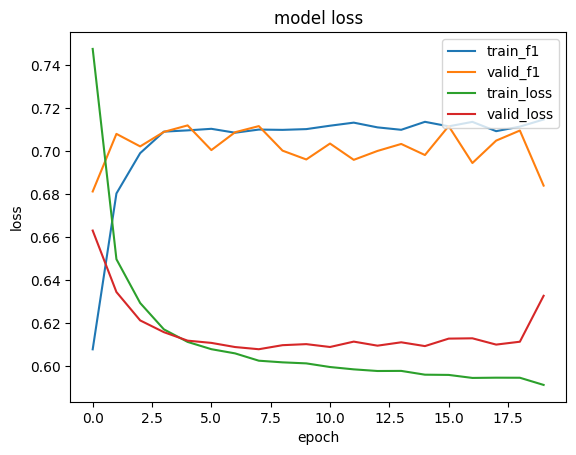

In [ ]:
plt.plot(history3.history['classification_f1_score'])
plt.plot(history3.history['val_classification_f1_score'])
plt.plot(history3.history['classification_loss'])
plt.plot(history3.history['val_classification_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_f1', 'valid_f1', 'train_loss', 'valid_loss'], loc='upper right')
plt.show()

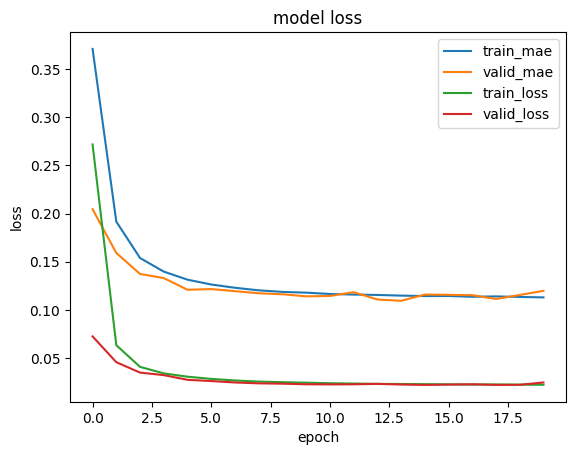

In [ ]:
plt.plot(history3.history['regression_mae'])
plt.plot(history3.history['val_regression_mae'])
plt.plot(history3.history['regression_loss'])
plt.plot(history3.history['val_regression_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_mae', 'valid_mae', 'train_loss', 'valid_loss'], loc='upper right')
plt.show()

In [ ]:
y_train_pred = model3.predict(X_train_nn)
y_valid_pred = model3.predict(X_valid_nn)
y_test_pred = model3.predict(X_test_nn)

540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


In [ ]:
y_train_pred_prob, y_train_pred_time_std = y_train_pred[0], y_train_pred[1]
y_valid_pred_prob, y_valid_pred_time_std = y_valid_pred[0], y_valid_pred[1]
y_test_pred_prob, y_test_pred_time_std = y_test_pred[0], y_test_pred[1]

In [ ]:
y_train_pred_time = scalerY.inverse_transform(y_train_pred_time_std)
y_valid_pred_time = scalerY.inverse_transform(y_valid_pred_time_std)
y_test_pred_time = scalerY.inverse_transform(y_test_pred_time_std)

In [ ]:
train_rank_score = y_train_pred_prob / y_train_pred_time
valid_rank_score = y_valid_pred_prob / y_valid_pred_time
test_rank_score = y_test_pred_prob / y_test_pred_time

train_rank_score = train_rank_score.flatten()
valid_rank_score = valid_rank_score.flatten()
test_rank_score = test_rank_score.flatten()

In [ ]:
train_idx = train_df_model['efs'].index
valid_idx = valid_df_model['efs'].index
test_idx = test_df_model['efs'].index

In [ ]:
# prompt: write a function that attach index train_idx back to each row of train_rank_score

import pandas as pd

def attach_index_to_rows(train_rank_score, train_idx):
  """Attaches the index 'train_idx' back to each row of 'train_rank_score'."""
  train_rank_score_with_idx = pd.DataFrame({'rank_score': train_rank_score}, index=train_idx)
  return train_rank_score_with_idx

# Example usage:
train_rank_score_with_idx = attach_index_to_rows(train_rank_score, train_idx)
valid_rank_score_with_idx = attach_index_to_rows(valid_rank_score, valid_idx)
test_rank_score_with_idx = attach_index_to_rows(test_rank_score, test_idx)

In [ ]:
def calculate_stratified_concordance_index_v2(df_model, data, strata_column, predicted_risk_scores):
    """Calculates the stratified concordance index.

    Args:
        cph_model: A fitted CoxPHFitter model.
        data: A pandas DataFrame containing the data.
        strata_column: The name of the column to stratify by.

    Returns:
        The stratified concordance index.
    """
    concordance_indices = np.array([])
    for stratum_value in data[strata_column].unique():
      stratum_data_idx = data[data[strata_column] == stratum_value].index
      stratum_data = data.loc[stratum_data_idx]
      predicted_risk_scores_stratum = predicted_risk_scores.loc[stratum_data_idx]

      # Calculate concordance index for the stratum
      c_index = concordance_index(stratum_data['efs_time'], -predicted_risk_scores_stratum, stratum_data['efs']) # negate for concordance
      concordance_indices = np.append(concordance_indices, c_index)

    # Calculate the weighted average concordance index
    stratified_c_index = float(np.mean(concordance_indices) - np.std(concordance_indices))
    return stratified_c_index, concordance_indices

train_strat_ci_nn, train_cis_nn = calculate_stratified_concordance_index_v2(train_df_model, train_data, 'race_group', train_rank_score_with_idx)
valid_strat_ci_nn, valid_cis_nn = calculate_stratified_concordance_index_v2(valid_df_model, valid_data, 'race_group', valid_rank_score_with_idx)
test_strat_ci_nn, test_cis_nn = calculate_stratified_concordance_index_v2(test_df_model, test_data, 'race_group', test_rank_score_with_idx)

In [ ]:
train_strat_ci_nn, train_cis_nn

(0.6339103491952628,
 array([0.65750909, 0.63728797, 0.65142545, 0.63604261, 0.6527419 ,
        0.62973402]))

In [ ]:
valid_strat_ci_nn, valid_cis_nn

(0.6142920372839404,
 array([0.63490972, 0.60373185, 0.63355832, 0.61866317, 0.63672206,
        0.62760685]))

In [ ]:
test_strat_ci_nn, test_cis_nn

(0.6096336532162951,
 array([0.61560612, 0.63183864, 0.64358576, 0.60194722, 0.65250411,
        0.61663954]))